## TITLE:  Forecasting Future Sales: A Predictive Analysis of Corporación Favorita Grocery

# Intro

## General

A key factor in a company's retail performance is the ability to properly estimate sales and manage inventories. The key problem is predicting the sales and inventory requirements for each location to avoid overstocking and understocking, allowing the business to offer the greatest customer service while reducing losses and guaranteeing the store's sustainability.

In this research, we the Monaco group plan to utilize sevaral time series forecasting method to forecast store sales for the Ecuadorian grocery retailer Corporation Favorita. Dates, stores, product details, whether the item was on sale, and sales statistics are all included in the training data. Separate files are also provided with further information that could be helpful in developing the models.


#####  HYPOTHESIS: 

1. Promotion positively impacts sales.

NULL: There is no significant increase in sales when product-family are on promotion 

Alternate: There is a significant increase in sales when products are on promotion 



##### BUSINESS QUESTIONS:  

1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

3. Did the earthquake impact sales?

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

5. Are sales affected by promotions, oil prices and holidays?

6. What analysis can we get from the date and its extractable features?

7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)


# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [ ]:
# !pip install -q <lib_001> <lib_002> ...

#!pip install --upgrade pydantic
!pip install sweetviz


In [ ]:
#!pip install --upgrade pandas_profiling
#from pandas_profiling import ProfileReport

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [1]:
# Data handling
import pandas as pd
import numpy as np

#display all columns and rows 
pd.set_option('display.max_columns', None)

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns 

# EDA (pandas-profiling, etc. )
#from pandas_profiling import ProfileReport
from datetime import date
import sweetviz as sv

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os

import warnings
warnings.filterwarnings('ignore')



# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [2]:
#load the data 

Train_df = pd.read_csv('train.csv')
stores_df = pd.read_csv('stores.csv')
Transaction_df = pd.read_csv('transactions.csv')
oil_df = pd.read_csv('oil.csv')
submission_df = pd.read_csv('sample_submission.csv')
test_df = pd.read_csv('test.csv')
Holiday_df = pd.read_csv('holidays_events.csv')

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [ ]:
# Generate the report
report_Train_df = sv.analyze(Train_df)

# Visualize the report
report.show_html('report_Train_df.html', open_browser=True)

Store Number: Integers representing different stores

Item Number: Integers representing different stores

family: identifies the type of product sold.

sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

On Promotion: Telling whether the particular item sold had been assigned a special promotion pricing at the time in the specific store.
date: day the sale was made. 

In [ ]:
# Code here

# Generate the report
report_stores_df = sv.analyze(stores_df)

# Visualize the report
report.show_html('report_stores_df.html', open_browser=True)

- Store metadata, including city, state, type, and cluster.
- cluster is a grouping of similar stores.

In [ ]:
# Code here

# Generate the report
report_Transaction_df = sv.analyze(Transaction_df)

# Visualize the report
report.show_html('report_Transaction_df.html', open_browser=True)


The count of sales transactions for each date, store_nbr combination. 

In [ ]:
# Code here


# Generate the report
report_oil_df = sv.analyze(oil_df)

# Visualize the report
report.show_html('report_oil_df.html', open_browser=True)

- Daily oil price. 

- Includes values during both the train and test data timeframe. 

- (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices)

In [ ]:
# Code here


# Generate the report
report_test_df = sv.analyze(test_df)

# Visualize the report
report.show_html('report_test_df.html', open_browser=True)

Test data, with the date, store_nbr, item_nbr combinations that are to be predicted, along with the onpromotion information.

In [ ]:
# Code here


# Generate the report
report_Holiday_df = sv.analyze(Holiday_df)

# Visualize the report
report.show_html('report_Holiday_df.html', open_browser=True)


Holidays and Events, with metadata

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [3]:
# Use pandas.DataFrame.drop_duplicates method
Train_df.duplicated().any(), 
stores_df.duplicated().any(), 
oil_df.duplicated().any(),  
test_df.duplicated().any(),  
Holiday_df.duplicated().any() 

False

There are no duplicates in the data 

In [4]:
#checking missing values
null_values=pd.isnull(oil_df).sum()
null_values

date           0
dcoilwtico    43
dtype: int64

oil_df has 43 missing values 

## Impute Missing Values

In [5]:
#Filling missing values in oil data with the the value before that missing data
oil_df = oil_df.bfill()

In [6]:
#checking missing values
null_values=pd.isnull(oil_df).sum()
null_values

date          0
dcoilwtico    0
dtype: int64

## New Features Creation

In [7]:
#create a new column known as day which is the same as the date column
Train_df['day'] = Train_df['date']
test_df['day'] = test_df['date']

In [8]:
Train_df.head()

id        date  store_nbr      family  sales  onpromotion         day
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0  2013-01-01
1   1  2013-01-01          1   BABY CARE    0.0            0  2013-01-01
2   2  2013-01-01          1      BEAUTY    0.0            0  2013-01-01
3   3  2013-01-01          1   BEVERAGES    0.0            0  2013-01-01
4   4  2013-01-01          1       BOOKS    0.0            0  2013-01-01

In [9]:
#Convert date column to datetime attribute for each dataset with date column 

Train_df["date"] = pd.to_datetime(Train_df["date"], format='%Y-%m-%d')
Transaction_df["date"] = pd.to_datetime(Transaction_df["date"], format='%Y-%m-%d')
oil_df["date"] = pd.to_datetime(oil_df["date"], format='%Y-%m-%d')
Holiday_df["date"] = pd.to_datetime(Holiday_df["date"], format='%Y-%m-%d')

test_df["date"] = pd.to_datetime(test_df["date"], format='%Y-%m-%d')

In [10]:
#Merge all the dataset 
#Use left-join to main data consistency 

merged_df = pd.merge(Train_df, stores_df, on='store_nbr', how='left')
merged_df = pd.merge(merged_df,Transaction_df, on=['store_nbr','date'], how='left')
merged_df = pd.merge(merged_df,oil_df, on=['date'], how='left')
merged_df = pd.merge(merged_df,Holiday_df, on=['date'], how='left')


In [11]:
#Check for missing values after the merge 
merged_df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
day                   0
city                  0
state                 0
type_x                0
cluster               0
transactions     249117
dcoilwtico       878526
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

There are several missing values since we utilized a left-join 

In [12]:
#Dealing with missing values 

#Filling the missing data using the Backfill method
merged_df["transactions"].fillna(method='bfill', inplace=True)

merged_df["dcoilwtico"].fillna(method='bfill', inplace=True)

In [13]:
# Find the mode of the 'type_y' column
mode = merged_df['type_y'].mode()[0]

# Replace missing values in the 'type_y' column with the mode
merged_df['type_y'].fillna(mode, inplace=True)

In [14]:
# Find the mode of the 'locale' column
mode = merged_df['locale'].mode()[0]

# Replace missing values in the 'locale' column with the mode
merged_df['locale'].fillna(mode, inplace=True)

In [15]:
# Find the mode of the 'description' column
mode = merged_df['description'].mode()[0]

# Replace missing values in the 'description' column with the mode
merged_df['description'].fillna(mode, inplace=True)

In [16]:
# Find the mode of the 'locale_name' column
mode = merged_df['locale_name'].mode()[0]

# Replace missing values in the 'locale_name' column with the mode
merged_df['locale_name'].fillna(mode, inplace=True)

In [17]:
# Find the mode of the 'transferred' column
mode = merged_df['transferred'].mode()[0]

# Replace missing values in the 'locale_name' column with the mode
merged_df['transferred'].fillna(mode, inplace=True)

In [18]:
merged_df.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
day             0
city            0
state           0
type_x          0
cluster         0
transactions    0
dcoilwtico      0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

All missing values have been dealt with 

In [19]:
merged_df.head()

id       date  store_nbr      family  sales  onpromotion         day  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013-01-01   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013-01-01   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013-01-01   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013-01-01   
4   4 2013-01-01          1       BOOKS    0.0            0  2013-01-01   

    city      state type_x  cluster  transactions  dcoilwtico   type_y  \
0  Quito  Pichincha      D       13         770.0       93.14  Holiday   
1  Quito  Pichincha      D       13         770.0       93.14  Holiday   
2  Quito  Pichincha      D       13         770.0       93.14  Holiday   
3  Quito  Pichincha      D       13         770.0       93.14  Holiday   
4  Quito  Pichincha      D       13         770.0       93.14  Holiday   

     locale locale_name         description  transferred  
0  National     Ecuador  Primer dia del ano        False  
1  National     Ecuador  Primer dia del ano        False  
2  National     Ecuador  Primer dia del ano        False  
3  National     Ecuador  Primer dia del ano        False  
4  National     Ecuador  Primer dia del ano        False

In [20]:
#Set date column as index
merged_df = merged_df.set_index('date')

In [21]:
#rename column
merged_df.rename(columns = {'type_x':'Store_type'}, inplace = True)
merged_df.rename(columns = {'type_y':'Holiday_type'}, inplace = True)

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054348 entries, 2013-01-01 to 2017-08-15
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   day           object 
 6   city          object 
 7   state         object 
 8   Store_type    object 
 9   cluster       int64  
 10  transactions  float64
 11  dcoilwtico    float64
 12  Holiday_type  object 
 13  locale        object 
 14  locale_name   object 
 15  description   object 
 16  transferred   bool   
dtypes: bool(1), float64(3), int64(4), object(9)
memory usage: 399.1+ MB


In [23]:
merged_df.describe().T

count          mean            std    min        25%  \
id            3054348.0  1.504277e+06  866261.012008   0.00  754676.75   
store_nbr     3054348.0  2.750000e+01      15.585787   1.00      14.00   
sales         3054348.0  3.590209e+02    1107.285897   0.00       0.00   
onpromotion   3054348.0  2.617480e+00      12.254939   0.00       0.00   
cluster       3054348.0  8.481481e+00       4.649735   1.00       4.00   
transactions  3054348.0  1.664934e+03     955.738649   5.00    1032.00   
dcoilwtico    3054348.0  6.778930e+01      25.702576  26.19      46.28   

                     50%          75%         max  
id            1507571.50  2255120.250  3000887.00  
store_nbr          27.50       41.000       54.00  
sales              11.00      196.011   124717.00  
onpromotion         0.00        0.000      741.00  
cluster             8.50       13.000       17.00  
transactions     1357.00     2027.250     8359.00  
dcoilwtico         53.19       95.800      110.62

In [24]:
# Generate the report
report = sv.analyze(merged_df)

# Visualize the report
report.show_html('report_merged_df.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

NameError: name 'report' is not defined

In [25]:
#Create new attributes 'Year', 'Month' and 'Weekday Name'
merged_df['Year'] = merged_df.index.year
merged_df['Month'] = merged_df.index.month_name()
merged_df['Weekday_Name'] = merged_df.index.day_name()

In [26]:
#Change data attribute to datetime for consistency 
merged_df["day"] = pd.to_datetime(merged_df["day"], format='%Y-%m-%d')

In [27]:
#Final dataset for analysis 
merged_df.head()

id  store_nbr      family  sales  onpromotion        day   city  \
date                                                                          
2013-01-01   0          1  AUTOMOTIVE    0.0            0 2013-01-01  Quito   
2013-01-01   1          1   BABY CARE    0.0            0 2013-01-01  Quito   
2013-01-01   2          1      BEAUTY    0.0            0 2013-01-01  Quito   
2013-01-01   3          1   BEVERAGES    0.0            0 2013-01-01  Quito   
2013-01-01   4          1       BOOKS    0.0            0 2013-01-01  Quito   

                state Store_type  cluster  transactions  dcoilwtico  \
date                                                                  
2013-01-01  Pichincha          D       13         770.0       93.14   
2013-01-01  Pichincha          D       13         770.0       93.14   
2013-01-01  Pichincha          D       13         770.0       93.14   
2013-01-01  Pichincha          D       13         770.0       93.14   
2013-01-01  Pichincha          D       13         770.0       93.14   

           Holiday_type    locale locale_name         description  \
date                                                                
2013-01-01      Holiday  National     Ecuador  Primer dia del ano   
2013-01-01      Holiday  National     Ecuador  Primer dia del ano   
2013-01-01      Holiday  National     Ecuador  Primer dia del ano   
2013-01-01      Holiday  National     Ecuador  Primer dia del ano   
2013-01-01      Holiday  National     Ecuador  Primer dia del ano   

            transferred  Year    Month Weekday_Name  
date                                                 
2013-01-01        False  2013  January      Tuesday  
2013-01-01        False  2013  January      Tuesday  
2013-01-01        False  2013  January      Tuesday  
2013-01-01        False  2013  January      Tuesday  
2013-01-01        False  2013  January      Tuesday

## Answering the Business Questions 

### QUESTION 1: 
### Is the train dataset complete (has all the required dates)?

<AxesSubplot: ylabel='date'>

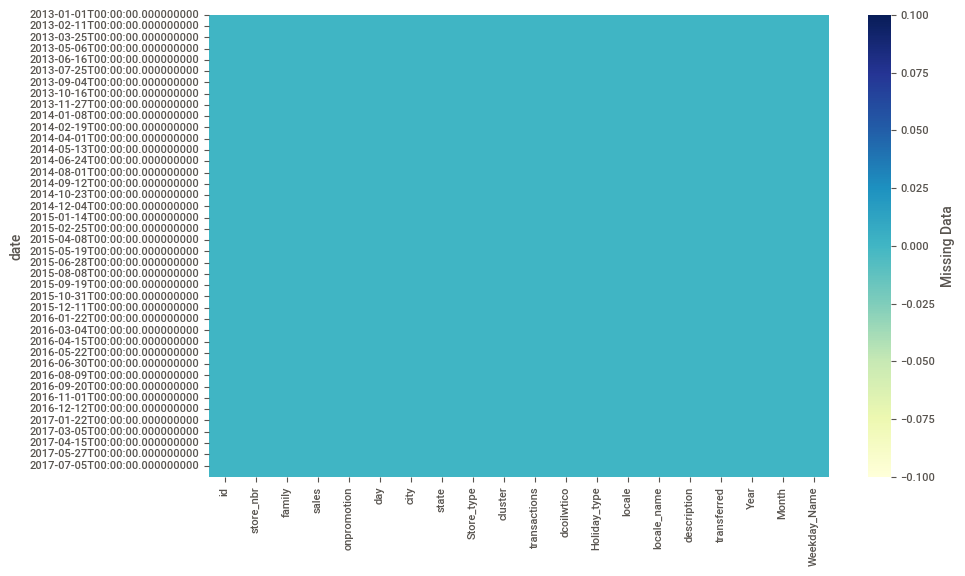

In [28]:
#Check the complettedness of the dataset using heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(merged_df.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

As can be observed the dataset has no missing values. 

In [29]:
#Checking for completeness of the dates

#we first determine the first and last dates 

merged_df.day.min(), merged_df.day.max()


(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [30]:
#Calculate the total expected number of days between the first and last days 
min_date = merged_df['day'].min()
max_date = merged_df['day'].max()
days_range = pd.date_range(start=min_date, end=max_date)
num_days = len(days_range)
num_days

1688

In [31]:
#Actual number of days
merged_df['day'].nunique()

1684

In [32]:
#Find the Missing dates
expected_dates = pd.date_range(start=merged_df['day'].min(), end=merged_df['day'].max())
missing_dates = expected_dates.difference(merged_df['day'])
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

From the result, the train dataset is mising 4 dates.These missing dates follow a sequence. All the years are missing dates of december 25th ( 12,25). This date is also a holiday in Ecuador. This analysis therfore assumes that no data was taken on this day every year as the shops may be closed down on that day each year.

### QUESTION 2

### Which dates have the lowest and highest sales for each year?

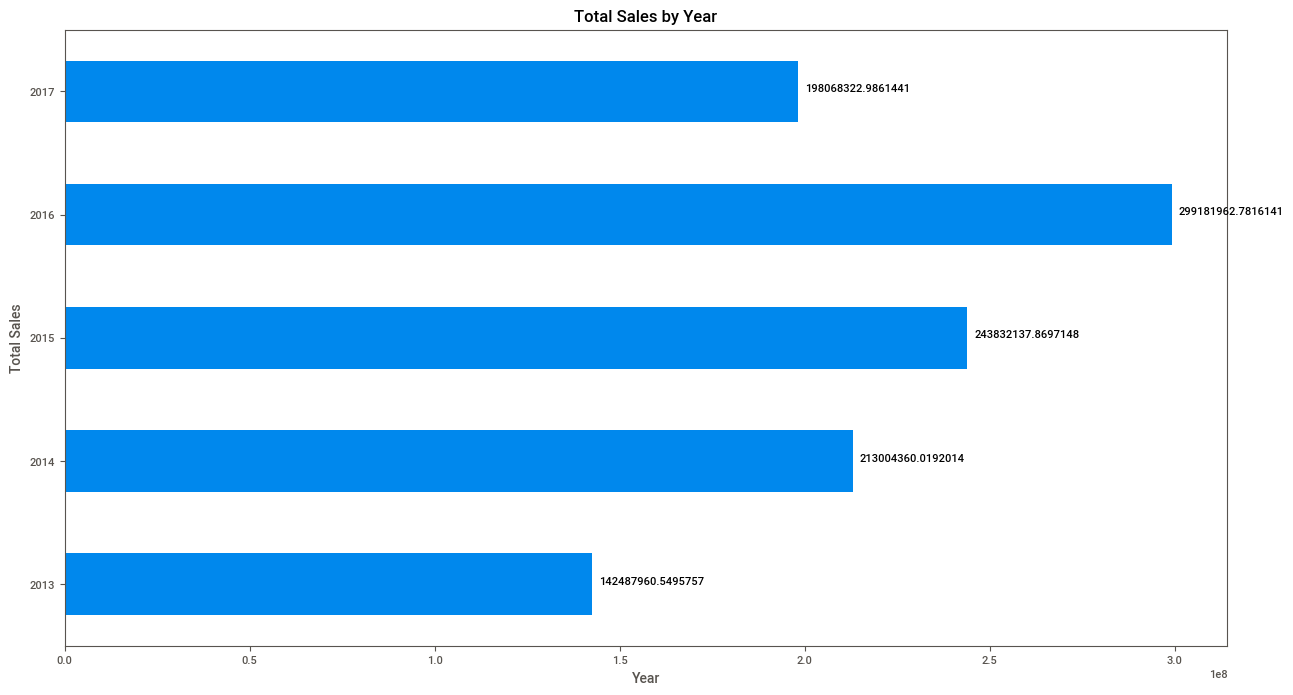

In [360]:
# Initialize figure and set size
plt.figure(figsize=(15,8))

# Group the data by year and sum the sales column for each year
grouped_df = merged_df.groupby(['Year'])['sales'].sum()

# Plot the sum of sales for each year as a bar plot
bars = grouped_df.plot.barh(title='Total Sales by Year')

# Loop through each bar and add its value as a data label
for i, v in enumerate(grouped_df):
    plt.annotate(str(v), xy=(v, i), xytext=(5, 0), textcoords='offset points', fontsize=8, color='black')

#In this example, the annotate function is used to add the value of each bar as a label. 
#The xy coordinate specifies the position of the text on the plot, while xytext 
#and textcoords specify the position of the text relative to the xy coordinate. 
#The fontsize argument sets the font size, and color sets the color of the text.

# Set x-axis label
plt.xlabel('Year')

# Set y-axis label
plt.ylabel('Total Sales')

# Display the plot
plt.show()


The Company recorded the highest sales in 2016, followed by 2015 and then 2014.The lowest sales was recorded in 2013 followed by 2017. However, the data for 2017 was collected for only 8 months (2017/08/15) which may account for the ranking. So we focus on the highest (2016) and howest (2013)

In [34]:
#Find the date with the highest sales record 

# Group the merged_df data by the day column and calculate the maximum sales value for each day
date_data = merged_df.groupby(by=["day"]).agg({"sales":"max"}).reset_index()

# Locate the row in date_data that has the maximum sales value
max_day = date_data.loc[date_data['sales'].idxmax()]

# Print the resulting row with the maximum sales value
print(max_day)


day      2016-05-02 00:00:00
sales               124717.0
Name: 1214, dtype: object


The highest sales recorded within the given period is 124,717 which occured on the 2nd of May, 2016

In [35]:
# Check the maximum sales per year 

# Extracting year from the 'day' column and adding it as a new column 'year' in merged_df
merged_df['year'] = pd.DatetimeIndex(merged_df['day']).year

# Grouping merged_df by year and day, and aggregating sales column to find the maximum value
date_data = merged_df.groupby(by=["year", "day"]).agg({"sales":"max"}).reset_index()

# Finding the row which has the maximum sales for each year 
max_day = date_data.loc[date_data.groupby(['year'])['sales'].idxmax()]

# Printing the resulting max_day dataframe
print(max_day)


      year        day       sales
315   2013 2013-11-12   46271.000
705   2014 2014-12-08   45361.000
1075  2015 2015-12-14   40351.460
1214  2016 2016-05-02  124717.000
1548  2017 2017-04-02   38422.625


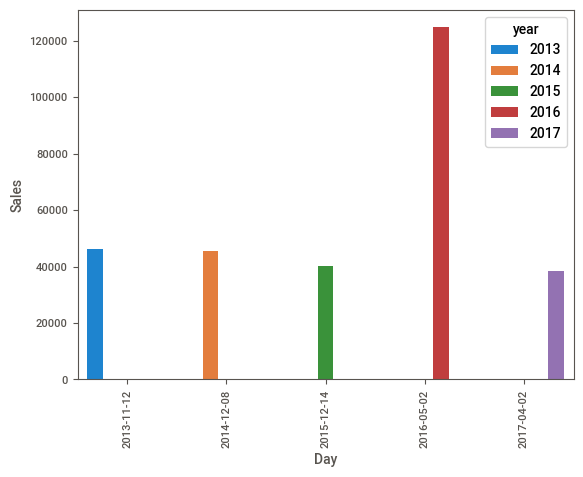

In [364]:
#Plot the day that recorded the maximum sales for each year  

# Add a new column 'day' to the merged_df dataframe, extracting just the date part from the existing day column
merged_df['day'] = pd.DatetimeIndex(merged_df['day']).date

# Group the merged_df dataframe by year and day, and get the maximum sales for each year/day combination
date_data = merged_df.groupby(by=["year", "day"]).agg({"sales":"max"}).reset_index()

# Get the maximum sales for each year, by finding the row with the maximum sales for each year
max_day = date_data.loc[date_data.groupby(['year'])['sales'].idxmax()]

# Use seaborn to create a bar plot, showing the maximum sales for each year, with the x-axis being the day and the y-axis being the sales
sns.barplot(x='day', y='sales', hue='year', data=max_day)

# Label the x-axis as "Day"
plt.xlabel("Day")

# Label the y-axis as "Sales"
plt.ylabel("Sales")

# Rotate the x-axis labels 90 degrees to make them more readable
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [37]:
#Check the day with the least recorded sale 

date_data = merged_df.groupby(by=["day"]).agg({"sales":"min"}).reset_index()
min_day = date_data.loc[date_data.groupby(['day'])['sales'].idxmax()]

#date_data = df.groupby(by=["day"]).agg({"sales":"max"}).reset_index()
min_day = date_data.loc[date_data['sales'].idxmax()]
print(min_day)

day      2013-01-01
sales           0.0
Name: 0, dtype: object


In [38]:
#Check the day with the least recorded sale for each year 

merged_df['year'] = pd.DatetimeIndex(merged_df['day']).year
date_data = merged_df.groupby(by=["year", "day"]).agg({"sales":"min"}).reset_index()
min_day = date_data.loc[date_data.groupby(['year'])['sales'].idxmax()]
print(min_day)

      year         day  sales
0     2013  2013-01-01    0.0
364   2014  2014-01-01    0.0
728   2015  2015-01-01    0.0
1092  2016  2016-01-01    0.0
1457  2017  2017-01-01    0.0


These are dates where the sales was completely zero. Interesting to see that the first day of year recorded Zero sales 

### QUESTION 3. 

### Did the earthquake impact sales?

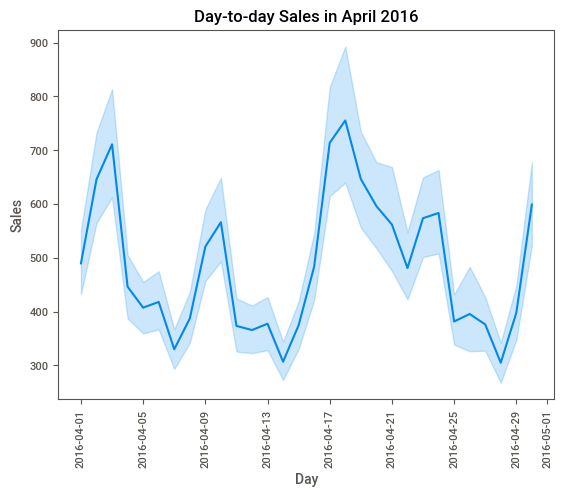

In [39]:
# Filter data to include only April of 2016
df = merged_df.copy()

# Filter data to include only April of 2016
april_2016_df = df[(df.index.month == 4) & (df.index.year == 2016)]

# Create line plot
sns.lineplot(data=april_2016_df['sales'])
plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("Day-to-day Sales in April 2016")
plt.xticks(rotation=90)
plt.show()

In [366]:
# Filter data to include only the 17th of April 2016
april_17_2016_df = april_2016_df[april_2016_df.index.day == 17]

# Filter data to include only the 17th of April 2016
april_16_2016_df = april_2016_df[april_2016_df.index.day == 16]

# Calculate the total sales made on the 17th of April 2016
total_sales_16th = april_16_2016_df['sales'].sum()

# Calculate the total sales made on the 17th of April 2016
total_sales_17th = april_17_2016_df['sales'].sum()

# Print the total sales
print("Total sales made on the 16th of April 2016:", total_sales_16th)

print("")

# Print the total sales
print("Total sales made on the 17th of April 2016:", total_sales_17th)

Total sales made on the 16th of April 2016: 862121.4920360001

Total sales made on the 17th of April 2016: 1271833.7392550001


So although the earthquake happened on the 16th of April, the 17th saw a sharp increase in sales, so we can confidently say the event did not negatively affect sales. 

### Question 4. 

### Are certain groups of stores selling more products? (Cluster, city, state, type)

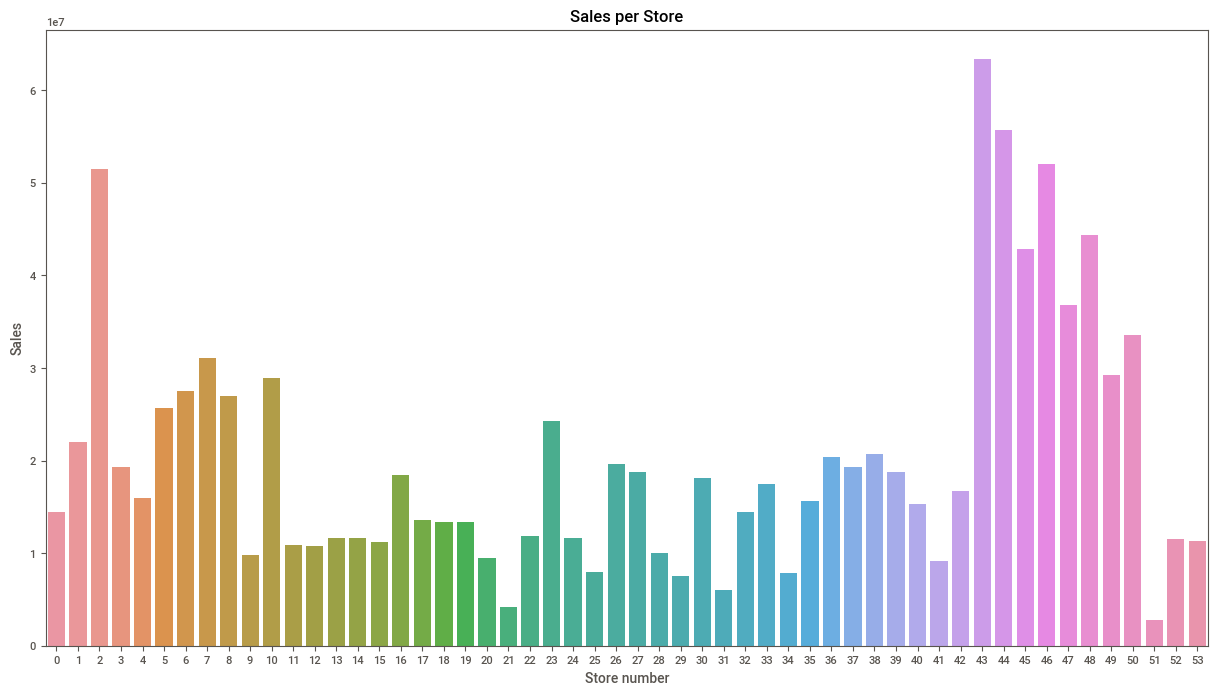

In [372]:
#Total sales of Each Store

x = merged_df.groupby(['store_nbr'],as_index = False).agg({'sales': 'sum'})

#ploting store_nbr vs unit sales

fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax = sns.barplot(x = x.index, y="sales", data = x)

plt.title('Sales per Store')
plt.ylabel('Sales')
plt.xlabel('Store number')
plt.show()

In [376]:
#Total sales of each store
x = merged_df.groupby(['store_nbr'], as_index=False).agg({'sales': 'sum'})

#Get the store with the highest sales
max_sales_store = x[x['sales'] == x['sales'].max()].iloc[0, 0]
max_sales = x[x['sales'] == x['sales'].max()].iloc[0, 1]

#Get the store with the minimum sales
min_sales_store = x[x['sales'] == x['sales'].min()].iloc[0, 0]
min_sales = x[x['sales'] == x['sales'].min()].iloc[0, 1]


print("Store with highest sales:", max_sales_store)
print("Corresponding sales value:", max_sales)
print("")
print("Store with lowest sales:", min_sales_store)
print("Corresponding sales value:", min_sales)

Store with highest sales: 44
Corresponding sales value: 63356137.229999

Store with lowest sales: 52
Corresponding sales value: 2764970.280249


Store number 44 has the highest sales 

In [375]:
store_43_sales = merged_df[merged_df['store_nbr'] == 43]['sales'].sum()
print(f"The sales for store 43 is: {store_43_sales}")


The sales for store 43 is: 16722039.3019436


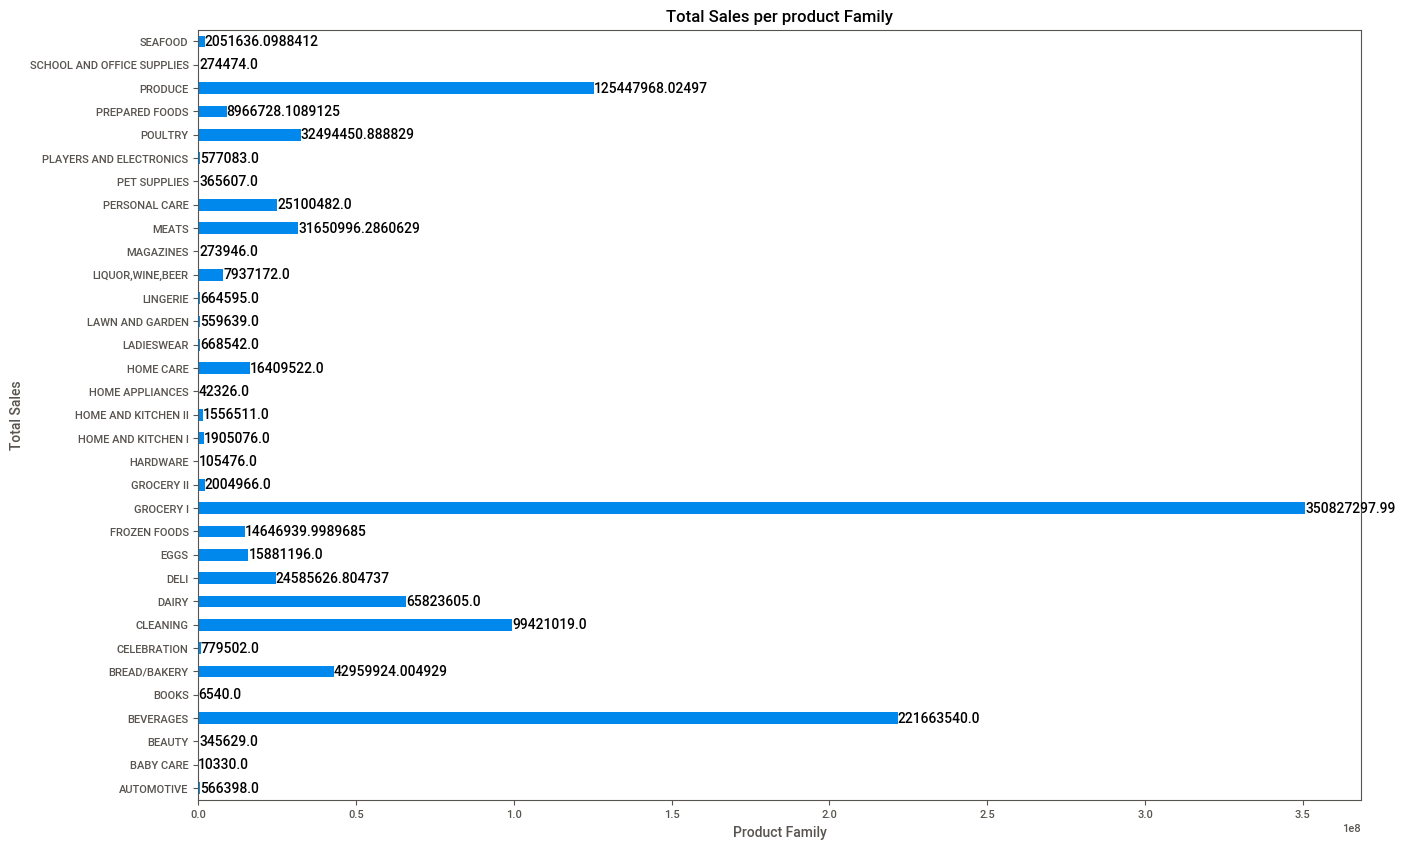

In [377]:
plt.figure(figsize=(15,10))
families = merged_df.groupby(['family'])['sales'].sum()
families.plot.barh(title='Total Sales per product Family')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')

for i, sales in enumerate(families):
    plt.text(sales, i, str(sales), color='black', va='center')

plt.show()


Grocery I has the highest sales 

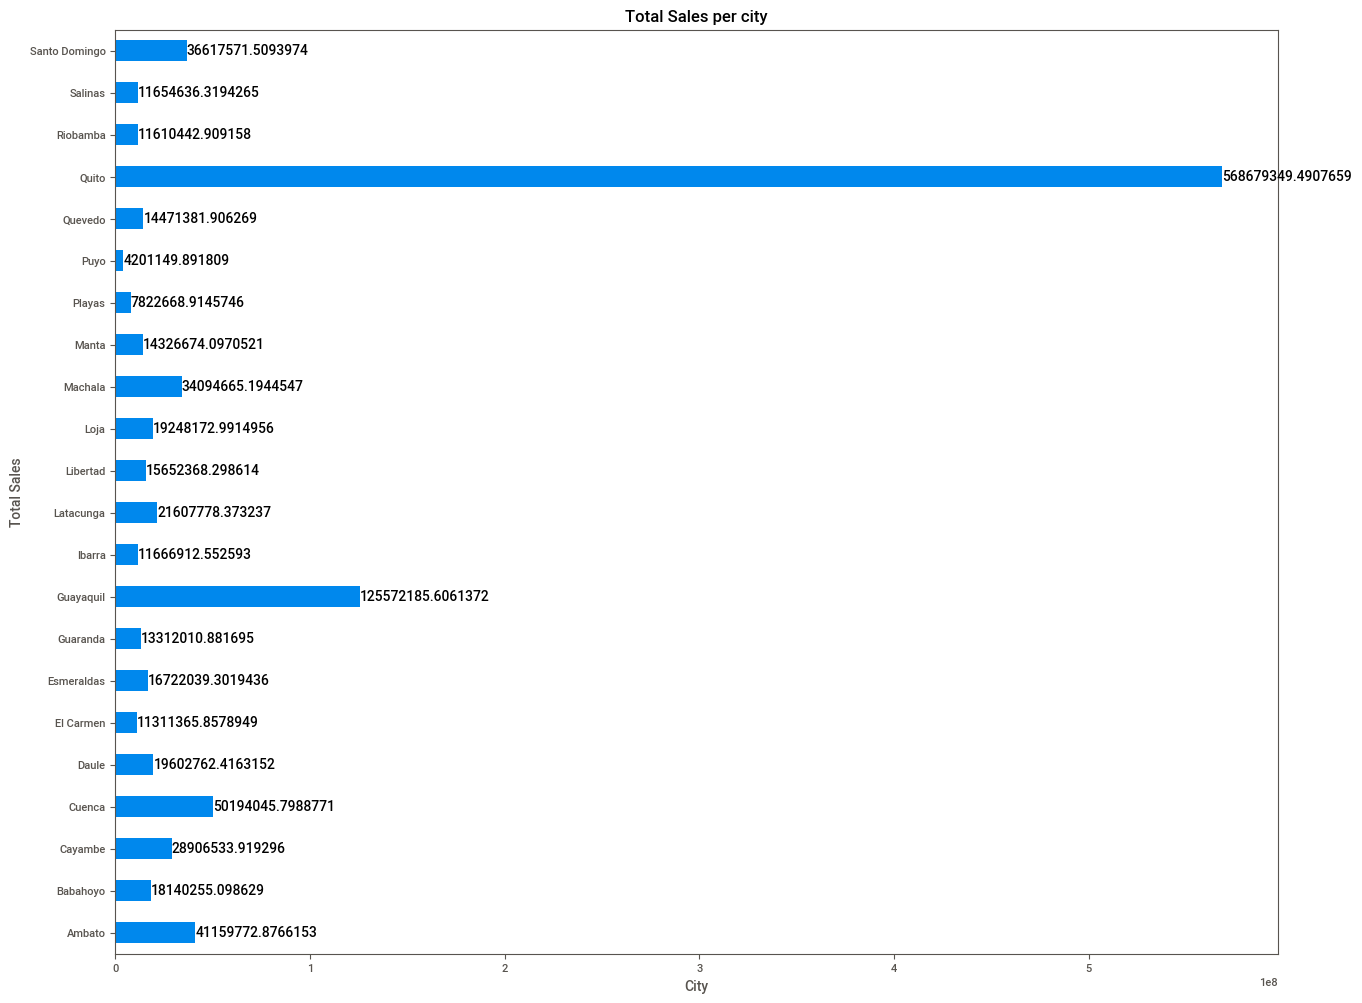

In [379]:
plt.figure(figsize=(15,12))

cities = merged_df.groupby(['city'])['sales'].sum()
cities.plot.barh(title='Total Sales per city')
plt.xlabel('City')
plt.ylabel('Total Sales')

for i, sales in enumerate(cities):
    plt.text(sales, i, str(sales), color='black', va='center')
    
plt.show()

Quito recorded the highest sales 

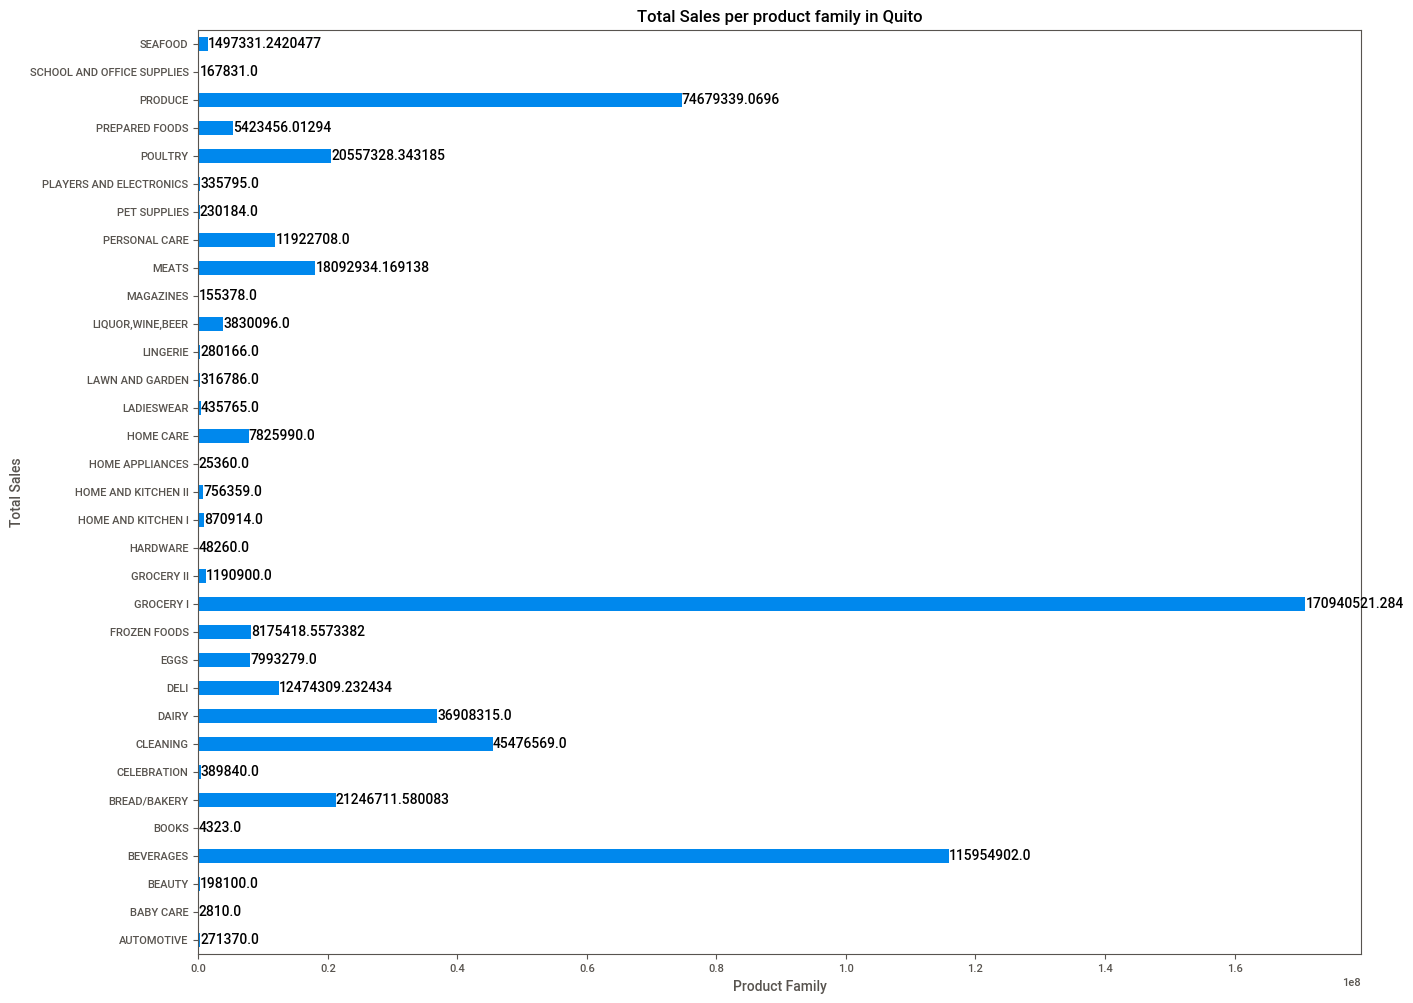

In [380]:
#We went ahead to investigate which product had the highest sale in Quito 

#Filter sales for Quito grouped by product and sales 
quito_sales = merged_df[merged_df['city'] == 'Quito'].groupby(['family'])['sales'].sum()
#Plot the results 
plt.figure(figsize=(15,12))
quito_sales.plot.barh(title='Total Sales per product family in Quito')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')

for i, sales in enumerate(quito_sales):
    plt.text(sales, i, str(sales), color='black', va='center')
    
plt.show()


Grocery I is the product with the highest sale in Quito. 

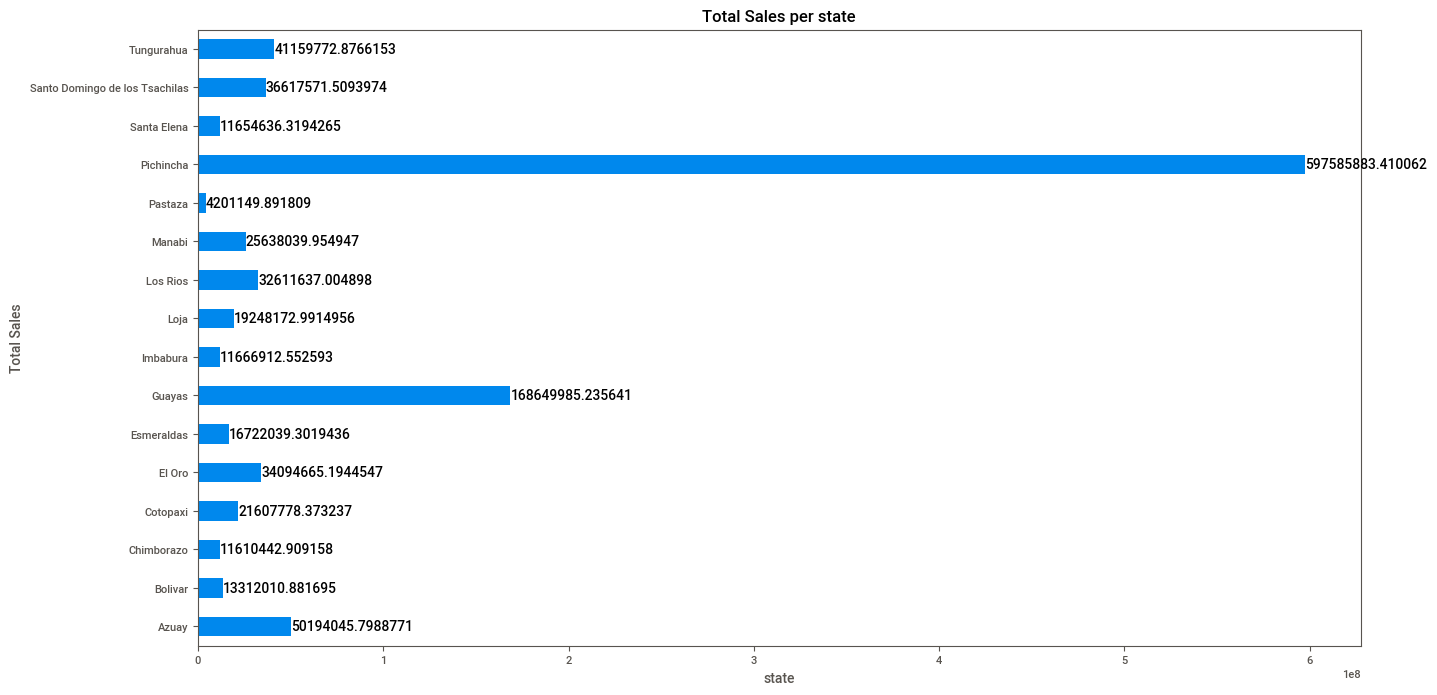

In [388]:
#Which state has the higest sales 

plt.figure(figsize=(15,8))
state_sales = merged_df.groupby(['state'])['sales'].sum()
state_sales.plot.barh(title='Total Sales per state')
plt.xlabel('state')
plt.ylabel('Total Sales')

for i, sales in enumerate(state_sales):
    plt.text(sales, i, str(sales), color='black', va='center')
    
plt.show()

Pinincha has the highest sales 

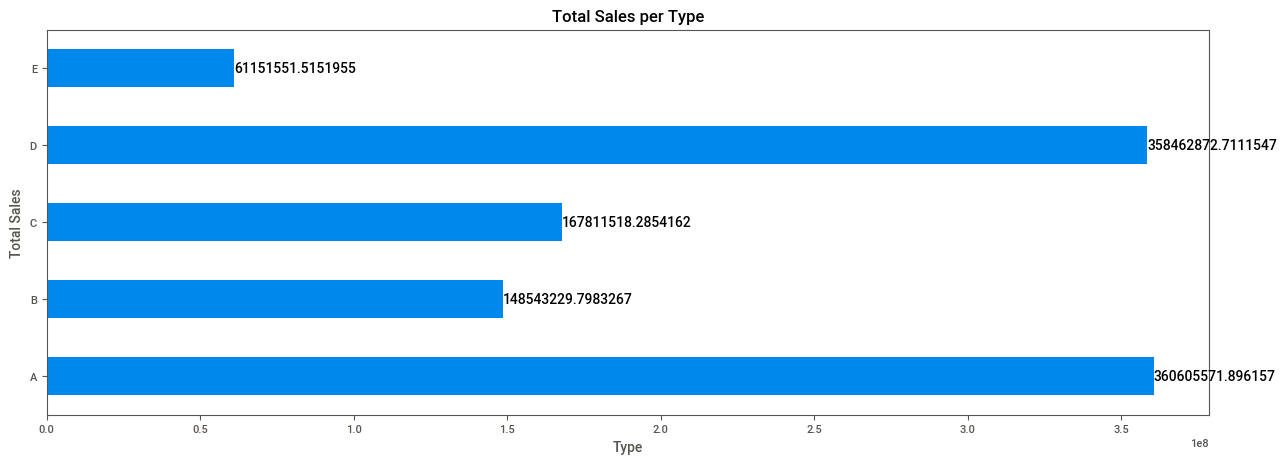

In [391]:
#Total Sales per Store Type 

plt.figure(figsize=(15,5))
storeType_sales = merged_df.groupby(['Store_type'])['sales'].sum()
storeType_sales.plot.barh(title='Total Sales per Type')
plt.xlabel('Type')
plt.ylabel('Total Sales')

for i, sales in enumerate(storeType_sales):
    plt.text(sales, i, str(sales), color='black', va='center')

plt.show()

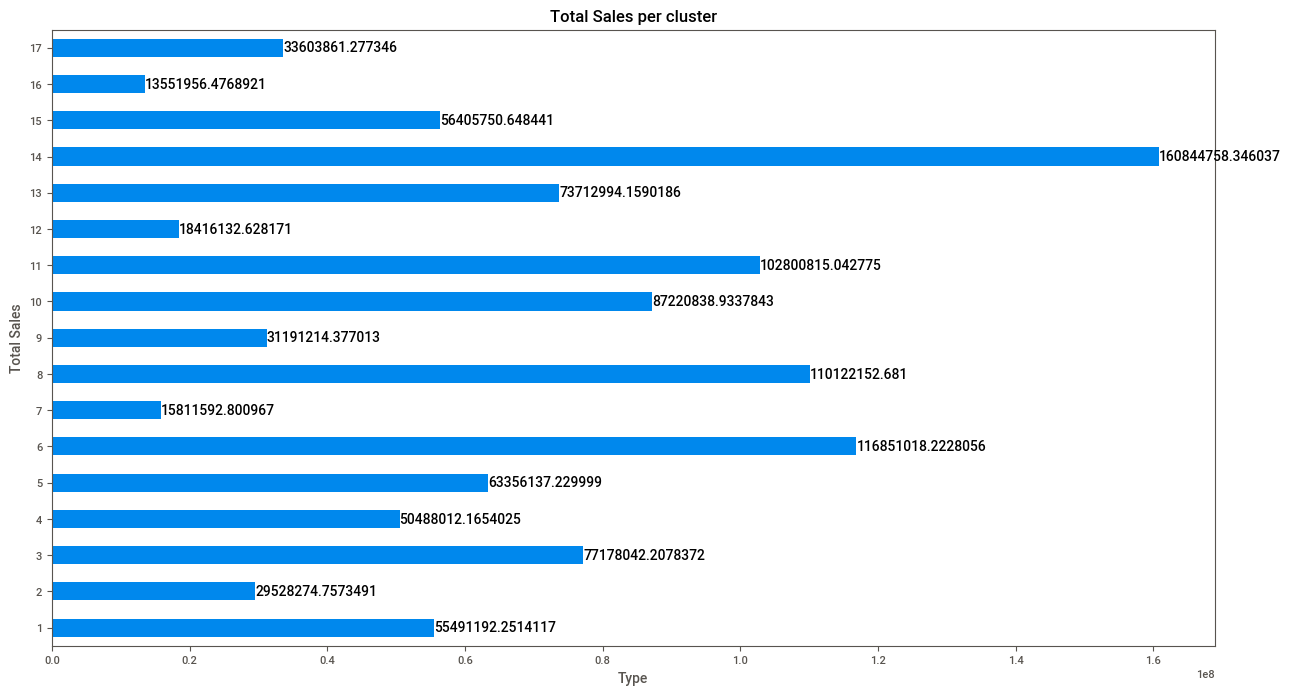

In [392]:
plt.figure(figsize=(15,8))
cluster_sales = merged_df.groupby(['cluster'])['sales'].sum()
cluster_sales.plot.barh(title='Total Sales per cluster')
plt.xlabel('Type')
plt.ylabel('Total Sales')

for i, sales in enumerate(cluster_sales):
    plt.text(sales, i, str(sales), color='black', va='center')

plt.show()

In [404]:
#store_nbr
# Group data by state and city, and calculate mean sales for each group
top_products = merged_df.groupby(['store_nbr','state','city','family', 'cluster']).agg({'sales':'mean'}).reset_index()

# Sort data by sales in descending order
top_products = top_products.sort_values(by='sales',ascending=False)

# Print top products
print(top_products.head())

      store_nbr      state   city     family  cluster        sales
1464         45  Pichincha  Quito  GROCERY I       11  9758.379966
1431         44  Pichincha  Quito  GROCERY I        5  9752.598498
1530         47  Pichincha  Quito  GROCERY I       14  9244.990951
1497         46  Pichincha  Quito  GROCERY I       14  8544.773046
1422         44  Pichincha  Quito  BEVERAGES        5  7990.765461


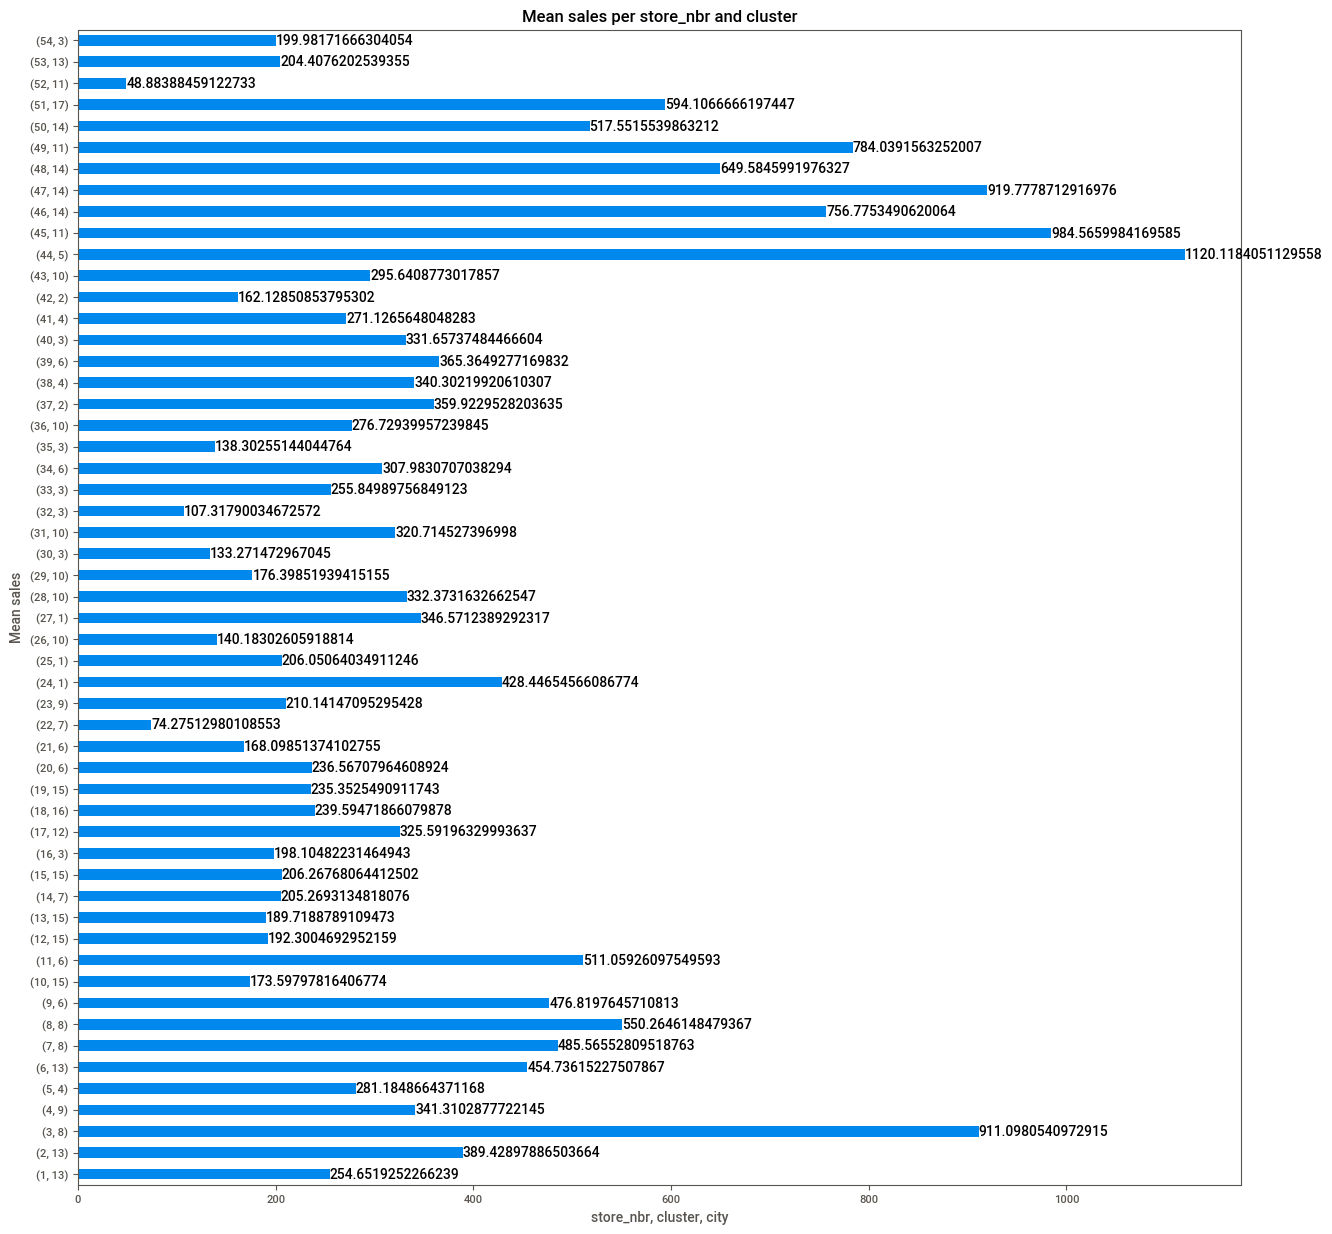

In [430]:
# Group data by store_nbr, cluster
top_products = merged_df.groupby(['store_nbr','cluster']).agg({'sales':'mean'}).reset_index()

# Sort data by sales in descending order
top_products = top_products.sort_values(by='sales',ascending=False)

# Plot the stacked bar plot
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
ax = top_products.groupby(['store_nbr', 'cluster'])['sales'].sum()
ax.plot(kind='barh', stacked=True)
plt.title('Mean sales per store_nbr and cluster')
plt.ylabel('Mean sales')
plt.xlabel('store_nbr, cluster, city')

for i, sales in enumerate(ax):
    plt.text(sales, i, str(sales), color='black', va='center')
    
    
plt.show()


<AxesSubplot: xlabel='state-city-cluster', ylabel='family'>

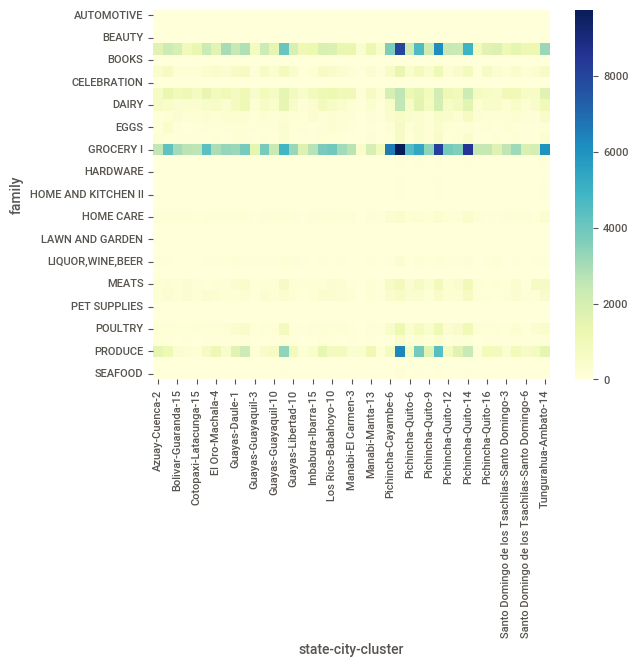

In [403]:
# Create pivot table
pivot_table = top_products.pivot_table(values='sales', index='family', columns=['state', 'city', 'cluster'])

# Plot heatmap
sns.heatmap(pivot_table, cmap='YlGnBu')


In [50]:
# Group data by state and city, and calculate mean sales for each group
Low_products = merged_df.groupby(['state','city','family', 'cluster']).agg({'sales':'mean'}).reset_index()

# Sort data by sales in ascending order
Low_products = top_products.sort_values(by='sales',ascending=True)

# Print lowest products
print(Low_products.head())


        state       city      family  cluster  sales
466    Guayas   Libertad       BOOKS       10    0.0
664    Manabi  El Carmen       BOOKS        3    0.0
319    Guayas  Guayaquil       BOOKS        6    0.0
598  Los Rios   Babahoyo       BOOKS       10    0.0
203    El Oro    Machala  LADIESWEAR        3    0.0


### QUESTION 5 

### Are sales affected by promotions, oil prices and holidays?

#### QUESTION 5.1: FOCUS ON PROMOTIONS 

In [51]:
#create a new column 'onpromotion_encoded'
merged_df['onpromotion_encoded'] = np.where(merged_df['onpromotion'] > 1, 1, 0)

In [52]:
#We decide to sample the dataset because it was too large to deal with
#So for cases where the large dataset is taking a toll on the computational resources, we use the samples version. 
#An example of such a case is when using seaborn. 

frac=0.1 #percentage of data to be utilized 
seed = 42 #for reproducibility 

# calculate number of rows for each year
year_counts = merged_df.groupby('year').size().reset_index(name='counts')

# calculate the sample size for each year
year_samples = (year_counts['counts'] * frac).astype(int)

# create an empty list to store the samples
samples = []

# loop through each year and sample the required number of rows
for year, sample_size in zip(year_counts['year'], year_samples):
    year_df = merged_df[merged_df['year'] == year]
    sample = year_df.sample(n=sample_size, random_state=seed)
    samples.append(sample)

# concatenate the samples into a single DataFrame
sampled_df = pd.concat(samples)


In [53]:
sampled_df.shape

(305433, 22)

([<matplotlib.patches.Wedge at 0x23adf23ec70>,
 [Text(-0.9857422915334328, 0.4881722387461385, 'No-promotion '),
  Text(0.9857422458274451, -0.4881723310379901, 'on-promotion ')],
 [Text(-0.5376776135636906, 0.2662757665888028, '85.4%'),
  Text(0.5376775886331517, -0.2662758169298128, '14.6%')])

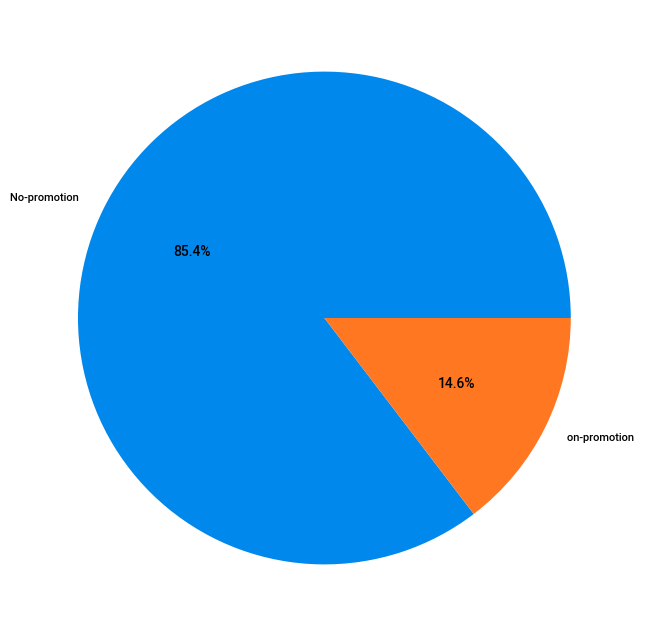

In [54]:
#A pie chart to show the distribution of the two labels 

plt.subplots(figsize = (10,8))
label = ['No-promotion ', 'on-promotion ']
label_data = merged_df['onpromotion_encoded'].value_counts()

plt.pie(label_data, labels=label, autopct='%1.1f%%')

In [55]:
#Determine teh correlation between sales and onpromotion
correlation = sampled_df['sales'].corr(sampled_df['onpromotion'])

print(correlation)

#0.42 is a good significant measure 

0.43075195189604654


<AxesSubplot: xlabel='onpromotion', ylabel='sales'>

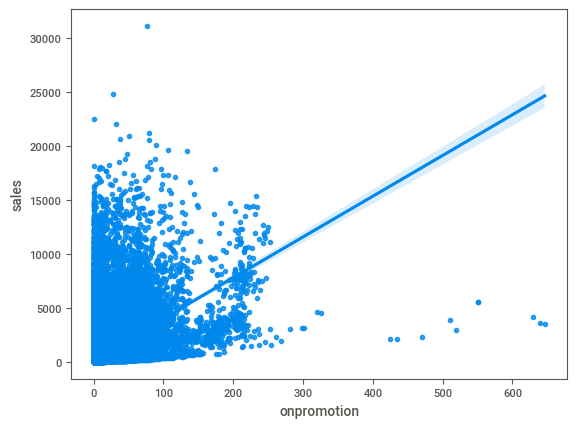

In [56]:
#import seaborn as sns

sns.regplot(x='onpromotion', y='sales', data=sampled_df)


Theres a strong correlation between products on promotion and the sales 

In [414]:
Avg_Promo_sales = sampled_df.groupby('onpromotion_encoded')['sales'].mean().reset_index()
Avg_Promo_sales = pd.merge(Avg_Promo_sales, sampled_df[['day','onpromotion_encoded']], on='onpromotion_encoded')

Avg_Promo_sales.head()

onpromotion_encoded       sales         day
0                    0  179.334524  2013-08-27
1                    0  179.334524  2013-01-07
2                    0  179.334524  2013-03-27
3                    0  179.334524  2013-07-10
4                    0  179.334524  2013-10-26

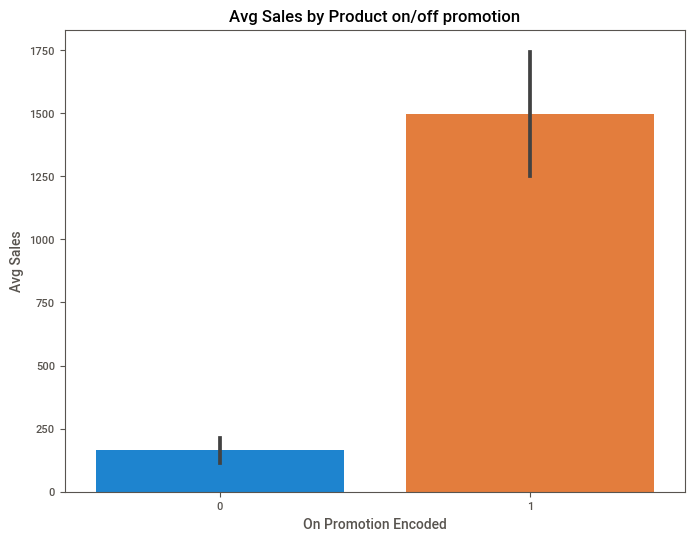

In [438]:
plt.figure(figsize=(8,6))

ax = sns.barplot(x='onpromotion_encoded', y='sales', data=Avg_Promo_sales)


#for i, sales in enumerate(Avg_Promo_sales['sales']):
#    plt.text(i, sales, str(round(sales, 2)), color='black', ha='center')

plt.xlabel('On Promotion Encoded')
plt.ylabel('Avg Sales')
plt.title('Avg Sales by Product on/off promotion')

plt.show()

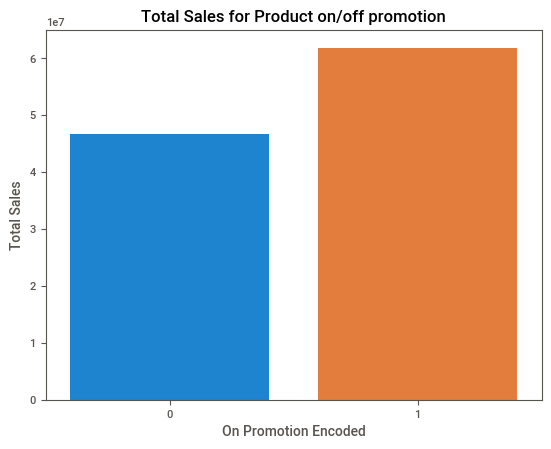

In [437]:
sum_Promo_sales = sampled_df.groupby('onpromotion_encoded')['sales'].sum().reset_index()
sns.barplot(x='onpromotion_encoded', y='sales', data=sum_Promo_sales)

plt.xlabel('On Promotion Encoded')
plt.ylabel('Total Sales')
plt.title('Total Sales for Product on/off promotion')

plt.show()


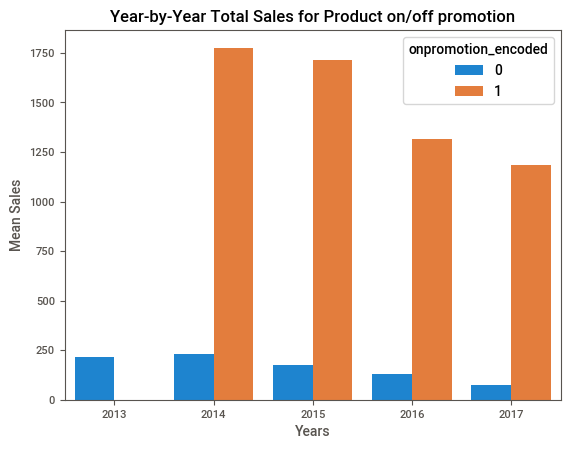

In [425]:
# Calculate the average sales for each year, separated by whether the product was on promotion or not
Avg_Promo_sales = sampled_df.groupby(['onpromotion_encoded', 'Year']).agg({'sales':'mean'}).reset_index()

# Create a bar plot to visualize the average sales for each year, separated by promotion status
sns.barplot(x = 'Year', y = 'sales', hue = 'onpromotion_encoded', data = Avg_Promo_sales)


plt.xlabel('Years')
plt.ylabel('Mean Sales')
plt.title('Year-by-Year Total Sales for Product on/off promotion')

plt.show()

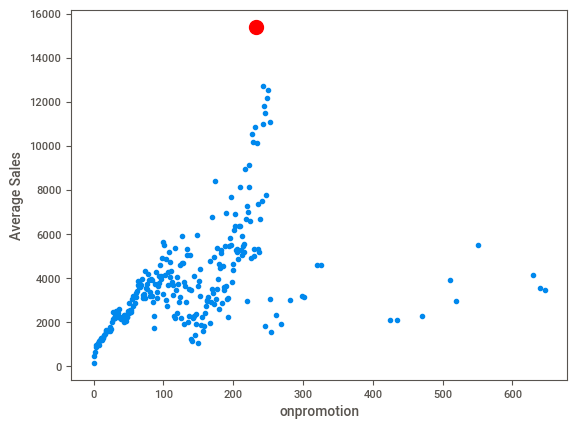

In [61]:
Avg_Promo_sales = sampled_df.groupby('onpromotion').agg({'sales':'mean'}).reset_index()

# Create the scatter plot
plt.scatter(Avg_Promo_sales['onpromotion'], Avg_Promo_sales['sales'])

# Identify the optimal onpromotion count
optimal_count = Avg_Promo_sales['onpromotion'][Avg_Promo_sales['sales'].idxmax()]

# Highlight the optimal onpromotion count
plt.scatter(optimal_count, Avg_Promo_sales.loc[Avg_Promo_sales['onpromotion'] == optimal_count, 'sales'], 
            marker='o', color='red', s=100)

plt.xlabel('onpromotion')
plt.ylabel('Average Sales')
plt.show()


We wanted to find that sweetspot in terms of the number of products on promtion that can maximize sales. As can be observed, having about 250 products on sale can optimize and improve average sales 

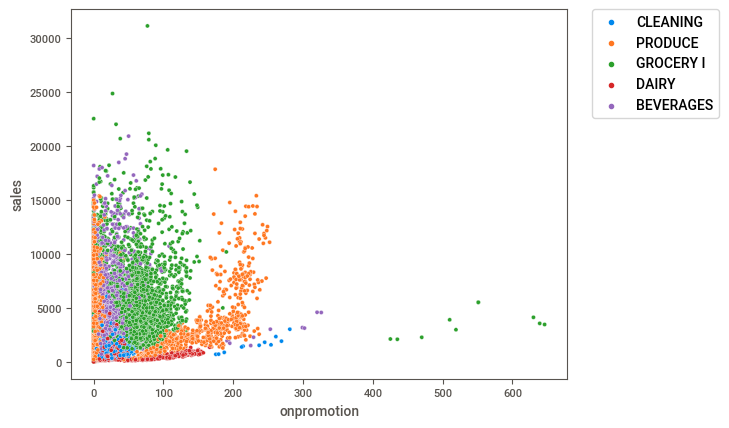

In [62]:
#we tried to find the relationship between the top 5 highest selling products and the number of products on promotion. 

#This gives us a fair idea of how many products of each family is on promotion. 


# Group data by 'family' and calculate mean sales
top_families = sampled_df.groupby('family')['sales'].mean().sort_values(ascending=False).head(5)
top_families_df = sampled_df[sampled_df['family'].isin(top_families.index)]

# Create scatter plot
sns.scatterplot(x='onpromotion', y='sales', hue='family', data=top_families_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


The plot shows the relationship between 'onpromotion' and 'sales' for the top 5 families. The plot is useful for visualizing how sales are affected by the presence of promotions for different families of products. Example Grocery 1 contributes to high sales and the products with about ~100 products on promotion contrinutes the most to the avearge sales.

#### QUESTION 5.2: FOCUS ON OIL PRICES 

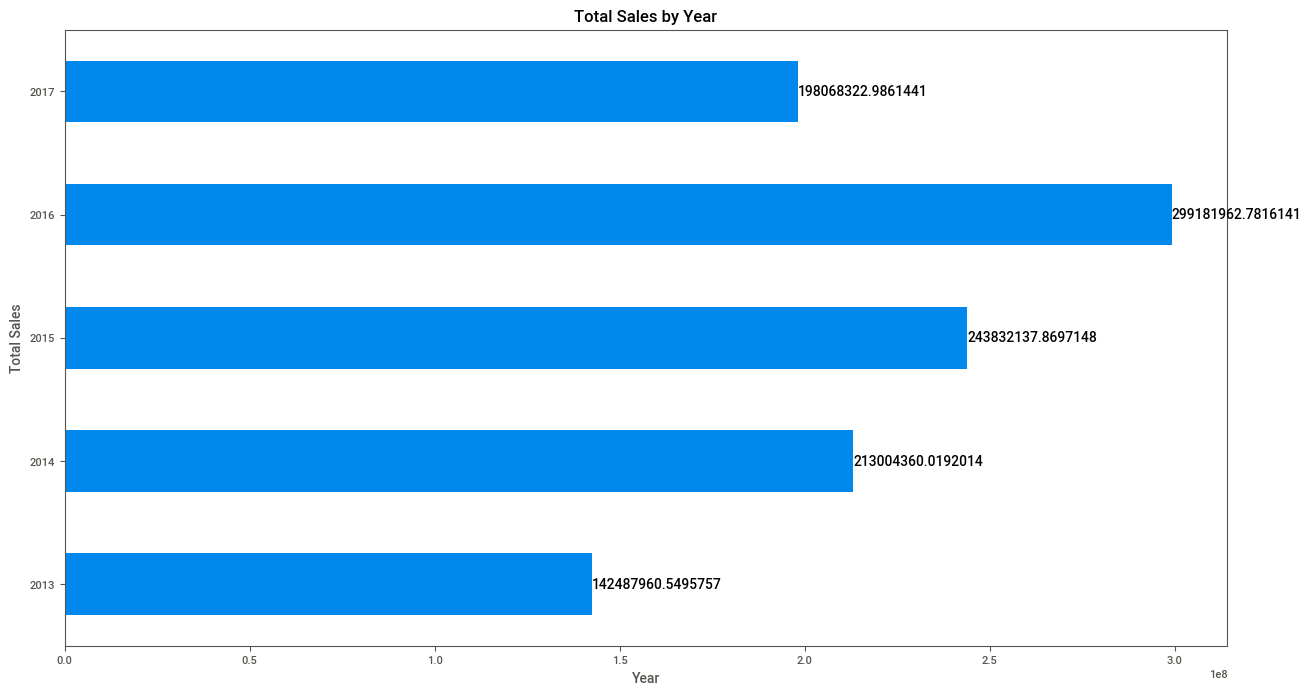

In [434]:
plt.figure(figsize=(15,8))
grouped_yearSales = merged_df.groupby(['Year'])['sales'].sum()
grouped_yearSales.plot.barh(title='Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

for i, sales in enumerate(grouped_yearSales):
    plt.text(sales, i, str(sales), color='black', va='center')

plt.show()


In [64]:
### oil_df plot the month by month graph of the dcoilwtico. 

oil_df2 = oil_df.set_index('date')

<AxesSubplot: xlabel='date', ylabel='dcoilwtico'>

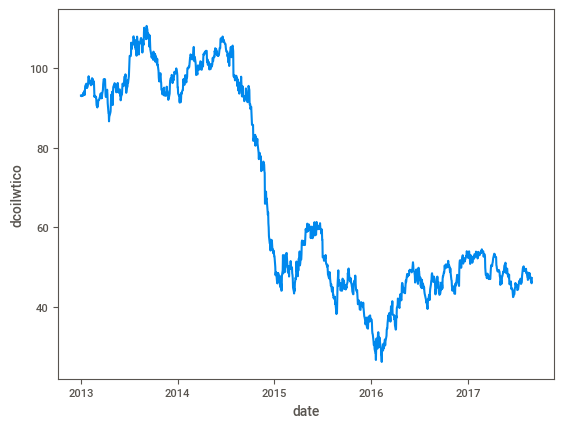

In [435]:
sns.lineplot(data=oil_df2, x=oil_df2.index, y='dcoilwtico')


Interesting trend shows that the year that had the highest sales also had the lowest price drop in oil. 

In [66]:
#Determine teh correlation between sales and onpromotion
correlation = sampled_df['sales'].corr(sampled_df['dcoilwtico'])
print(correlation)

-0.07570381881997289


There a negative correlation between dcoilwtico and sales

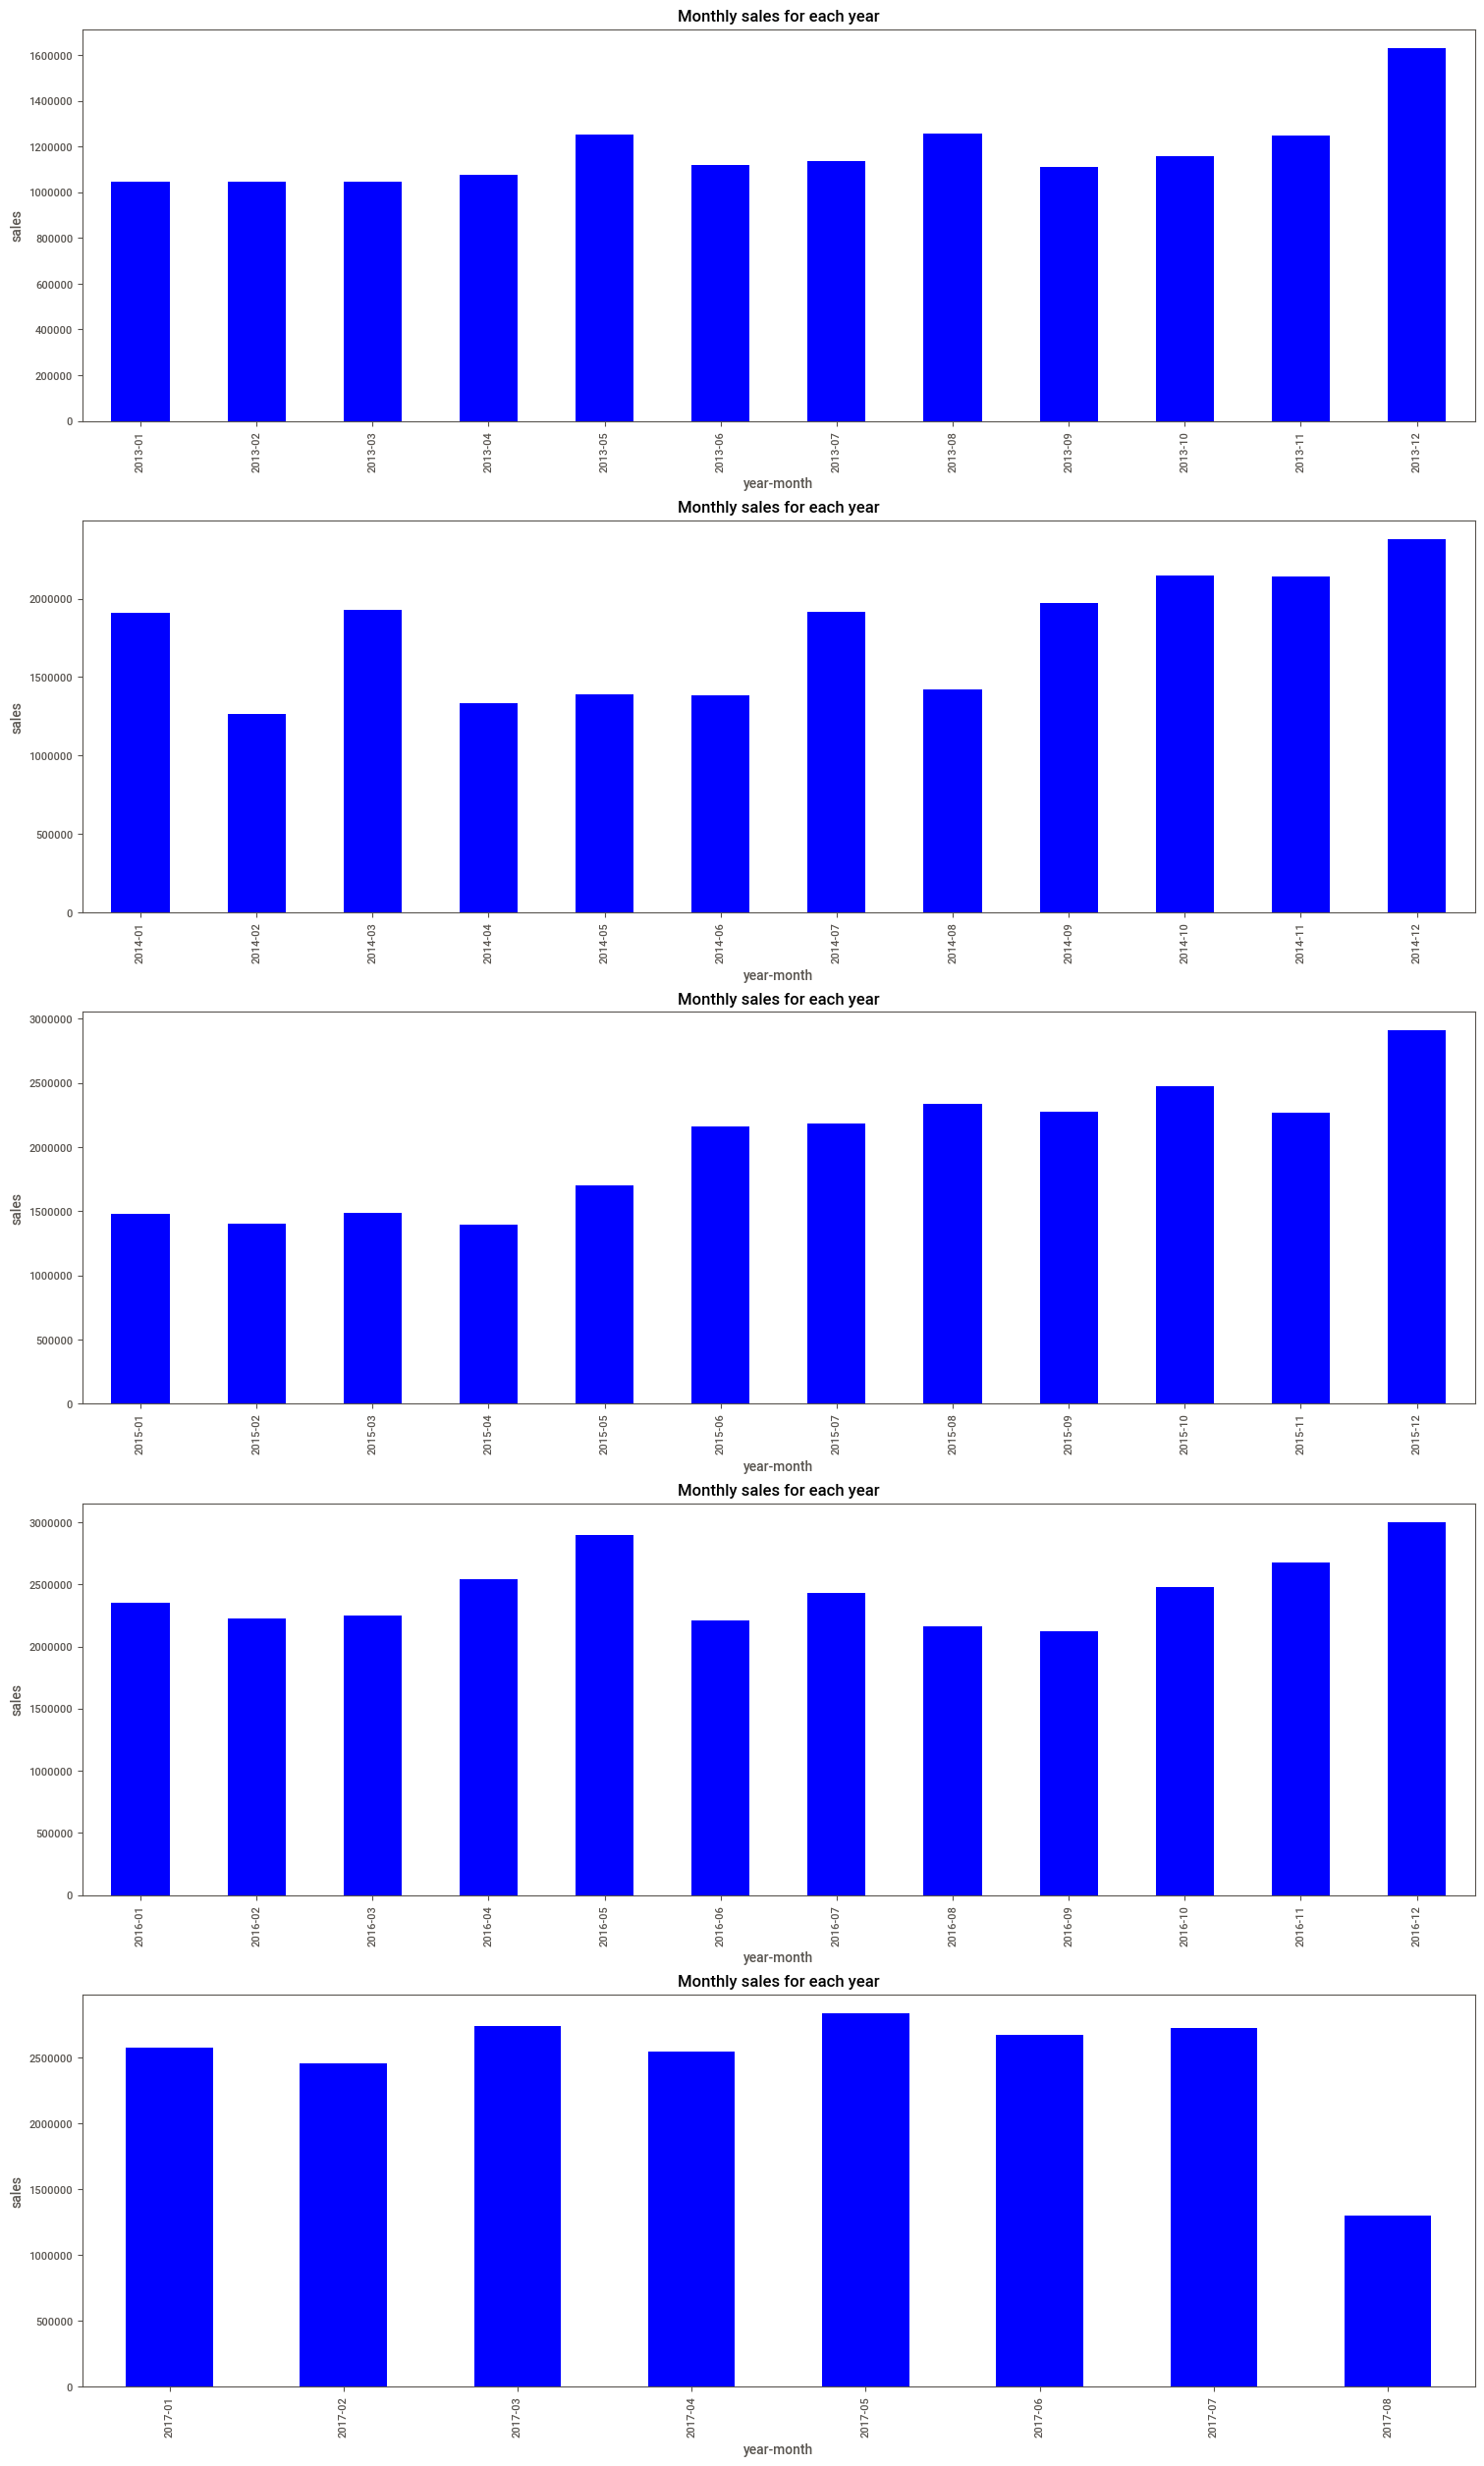

In [192]:
# Create a figure with 5 rows and 1 column of subplots
fig, axs = plt.subplots(figsize=(15,25), nrows=5, ncols=1, constrained_layout=True)

sampled_df['year_month'] = sampled_df.index.to_period("M")

# Get unique years
years = sampled_df.Year.unique()

# Iterate through years
for i, year in enumerate(years):
    data = sampled_df[sampled_df.Year == year]
    ax = axs[i]
    data.groupby(['year_month']).sum()['sales'].plot.bar(ax=ax, title=f"{year}",color='blue',linewidth=3)
    ax.set_title('Monthly sales for each year')
    ax.set_xlabel("year-month")
    ax.set_ylabel("sales")
plt.show()


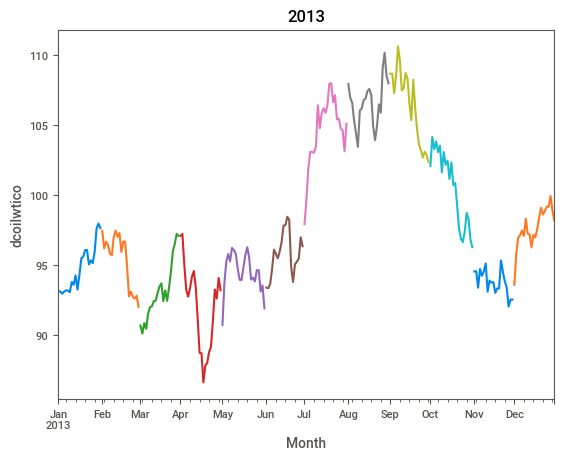

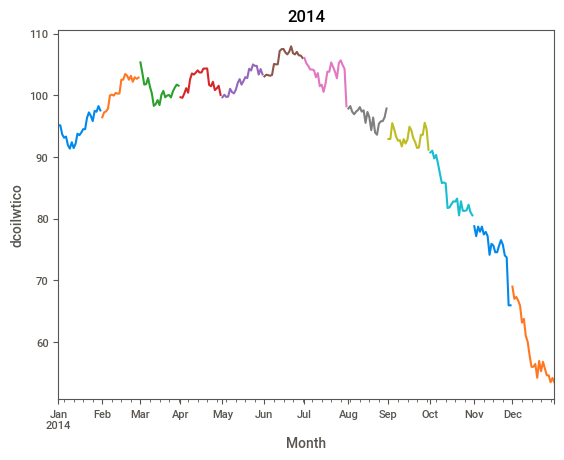

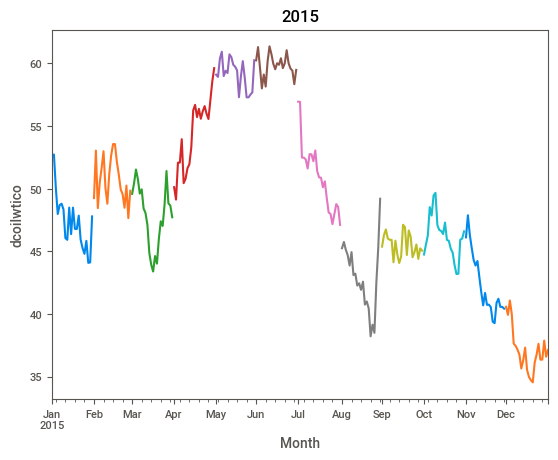

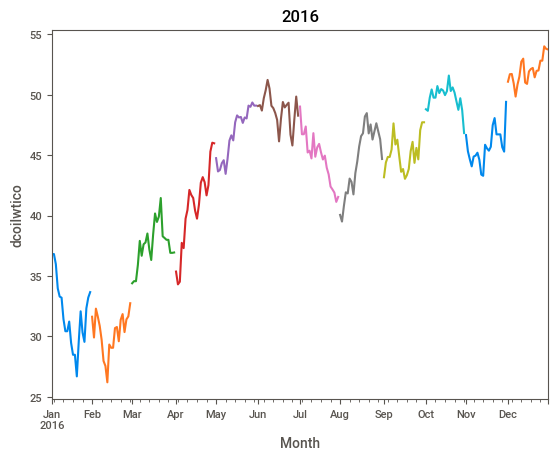

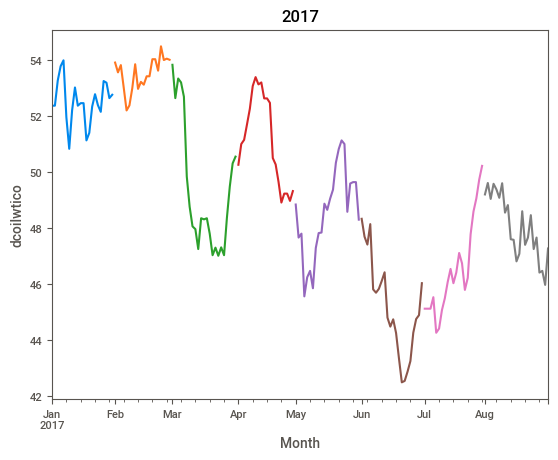

In [68]:
oil_df2['year'] = oil_df2.index.year
oil_df2['Month'] = oil_df2.index.month_name()
oil_df2['Weekday_Name'] = oil_df2.index.day_name()

years = oil_df2['year'].unique()

for year in years:
    year_df = oil_df2[oil_df2['year'] == year]
    year_df.groupby(year_df.index.month)['dcoilwtico'].plot()
    plt.title(year)
    plt.xlabel('Month')
    plt.ylabel('dcoilwtico')
    plt.show()



#### QUESTION 5.3: FOCUS ON HOLIDAYS

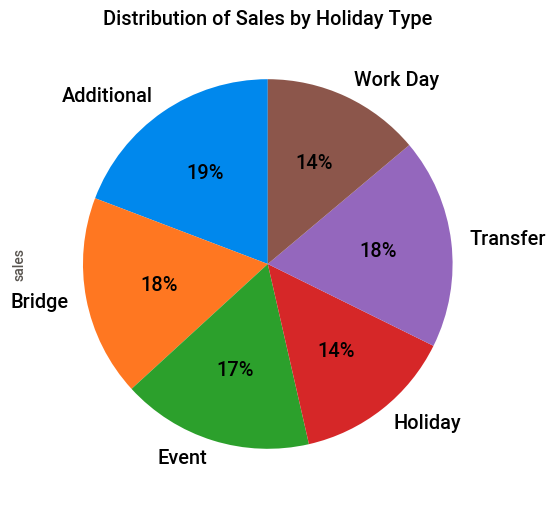

In [436]:
#Merge the sales data with holiday data
Train_Holiday_df2 = pd.merge(Train_df,Holiday_df,how="left",on="date")

#Fill missing holiday type values with 'Work Day'
Train_Holiday_df2.type.fillna("Work Day",inplace=True)

#Group the data by holiday type and calculate the average sales for each type
avg_sales_by_type = Train_Holiday_df2.groupby("type").agg({"sales":"mean"})

#Create a figure and axis object
fig, ax = plt.subplots(figsize=(12,6))

#Plot a pie chart of the average sales by holiday type
avg_sales_by_type.plot.pie(y="sales",ax=ax, legend=False, autopct='%1.f%%',
startangle=90, labels=list(avg_sales_by_type.index.values), fontsize="x-large")

#Add a title
ax.set_title("Distribution of Sales by Holiday Type", fontsize="x-large")

#Display the plot
plt.show()


### QUESTION 6

### What analysis can we get from the date and its extractable features?

#### QUESTION 6.1: Sales Analysis with Time

In [462]:
# Group data by date and sum sales
sales_grouped  = merged_df.groupby('date').agg({'sales':'sum'}).to_period("D")

# Create new columns with year, quarter, month, week, day of week, day of month, and day of year
sales_grouped['year'] = sales_grouped.index.year
sales_grouped['quarter'] = sales_grouped.index.quarter
sales_grouped['month'] = sales_grouped.index.month
sales_grouped['week'] = sales_grouped.index.week
sales_grouped['dayofweek'] = sales_grouped.index.dayofweek
sales_grouped['dayofmonth'] = sales_grouped.index.day
sales_grouped['dayofyear'] = sales_grouped.index.dayofyear

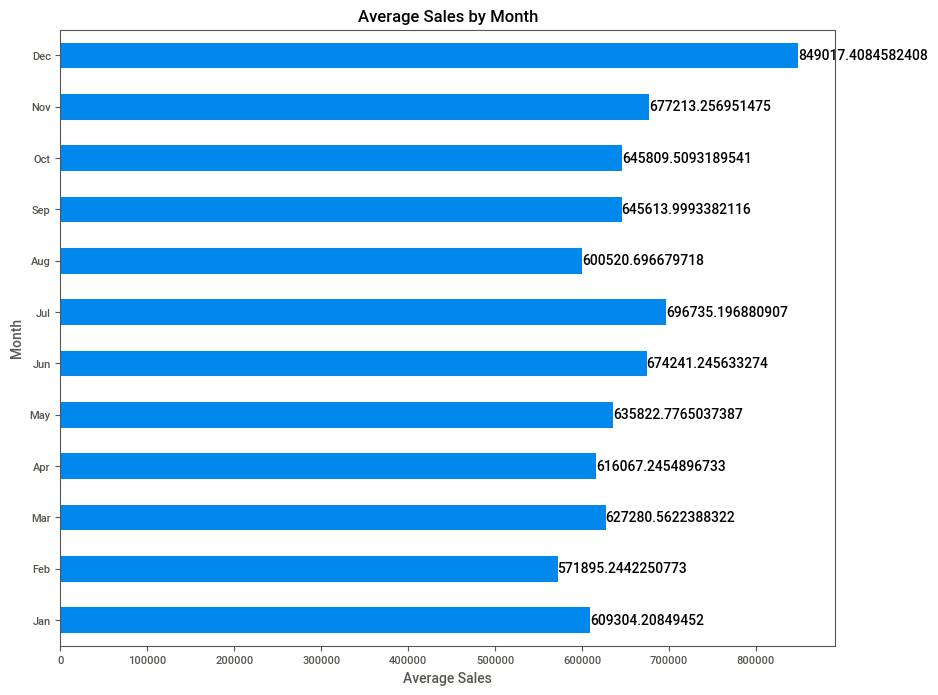

In [457]:
# Plotting the average sales per month
fig, ax1 = plt.subplots(figsize = (10,8)) # Creating a subplot with specified size

sales_g = sales_grouped.groupby(['month']).agg({'sales':'mean'})
sales_g.plot(kind="barh",ax=ax1) # Grouping the sales data by month and plotting the mean sales in bar format

ax1.set(title="Average Sales by Month") # Setting the title of the plot

ax1.set(ylabel="Month", xlabel="Average Sales") # Labeling the y and x axis

ax1.get_legend().remove() # Removing the legend

labels1 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # Defining the month labels

ax1.set_yticks(range(0,12)) # Setting the tick positions on the y axis

ax1.set_yticklabels(labels1) # Setting the tick labels on the y axis

for i, sales in enumerate(sales_g['sales']):
    plt.text(sales, i, str(sales), color='black', va='center')


<Figure size 1500x500 with 0 Axes>

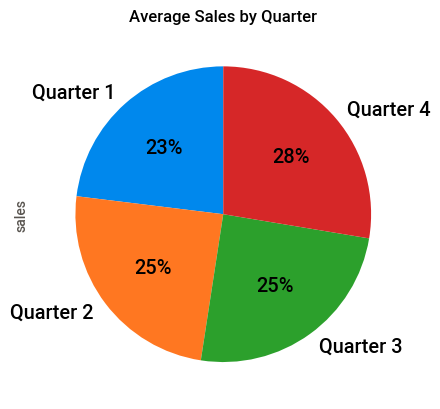

In [458]:
#Average Sales per Quarter 

plt.figure(figsize=(15, 5))
sales_grouped.groupby(['quarter']).agg({'sales':'mean'}).plot.pie(y='sales', legend=False, autopct='%1.f%%', startangle=90, labels=["Quarter 1","Quarter 2","Quarter 3","Quarter 4"], fontsize="x-large")
plt.title("Average Sales by Quarter")
plt.show()


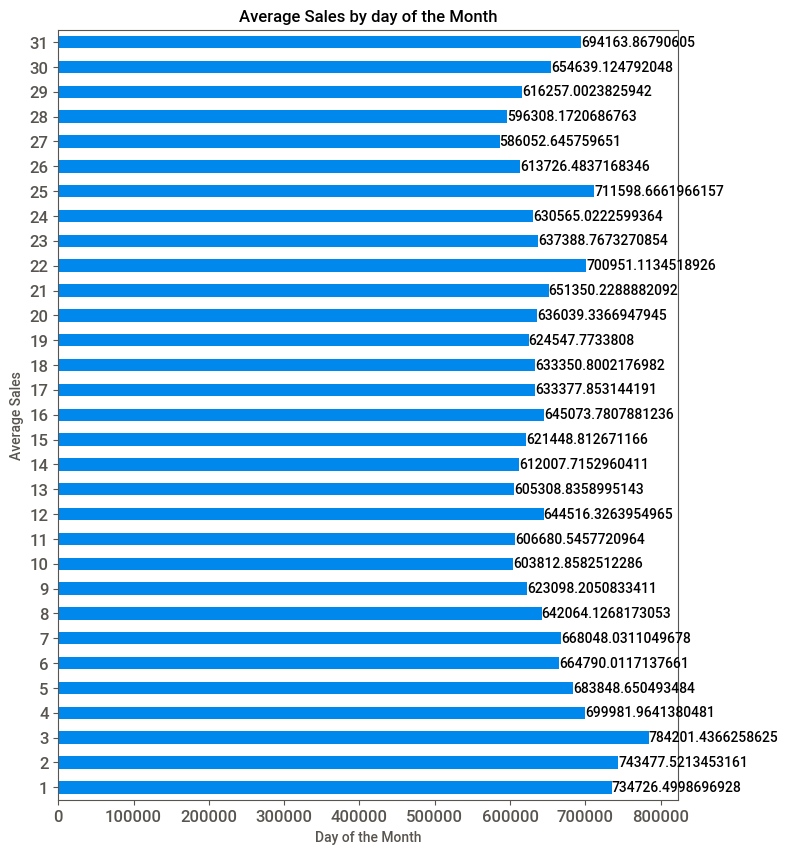

In [459]:
#figsize = (20,5)
fig,ax1 = plt.subplots(figsize=(8,10))
sales_grouped = sales_grouped.groupby(['dayofmonth']).agg({'sales':'mean'})
sales_grouped.plot.barh(ax=ax1,  fontsize="large")
ax1.set(title="Average Sales by day of the Month")
ax1.set(ylabel="Average Sales", xlabel="Day of the Month")
ax1.get_legend().remove()

for i, sales in enumerate(sales_grouped['sales']):
    plt.text(sales, i, str(sales), color='black', va='center')


plt.show();

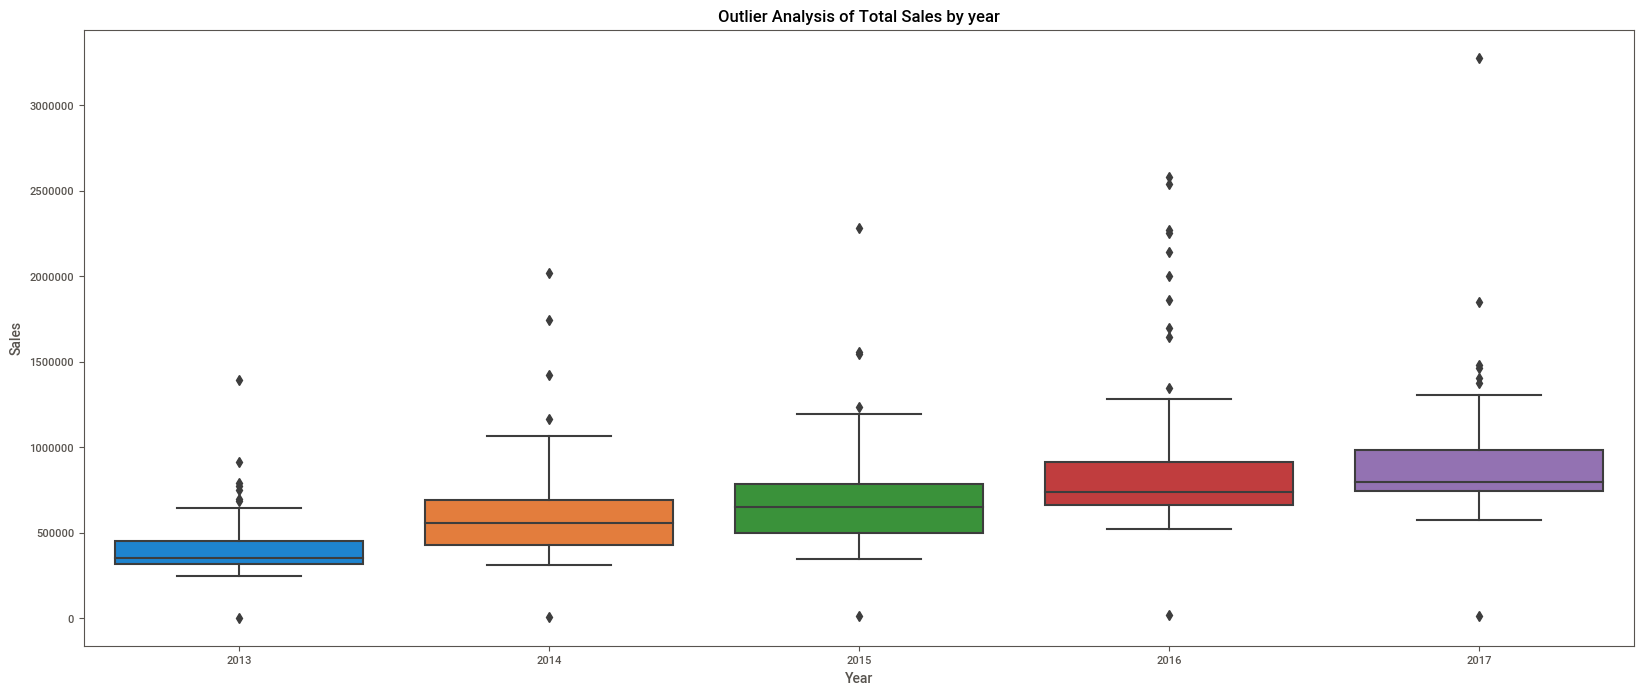

In [463]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=sales_grouped, x='year', y='sales', ax=ax)
ax.set(title="Outlier Analysis of Total Sales by year")
ax.set_xlabel("Year")
ax.set_ylabel("Sales")
plt.show()


A moving average is a technique to get an overall idea of the trends in a data set; it is an average of any subset of numbers. The moving average is extremely useful for forecasting long-term trends. This would help us to understand how the sales behave at different times to understand their seasonality and the overall trend. Seasonalities include each season, monthly, quarterly.

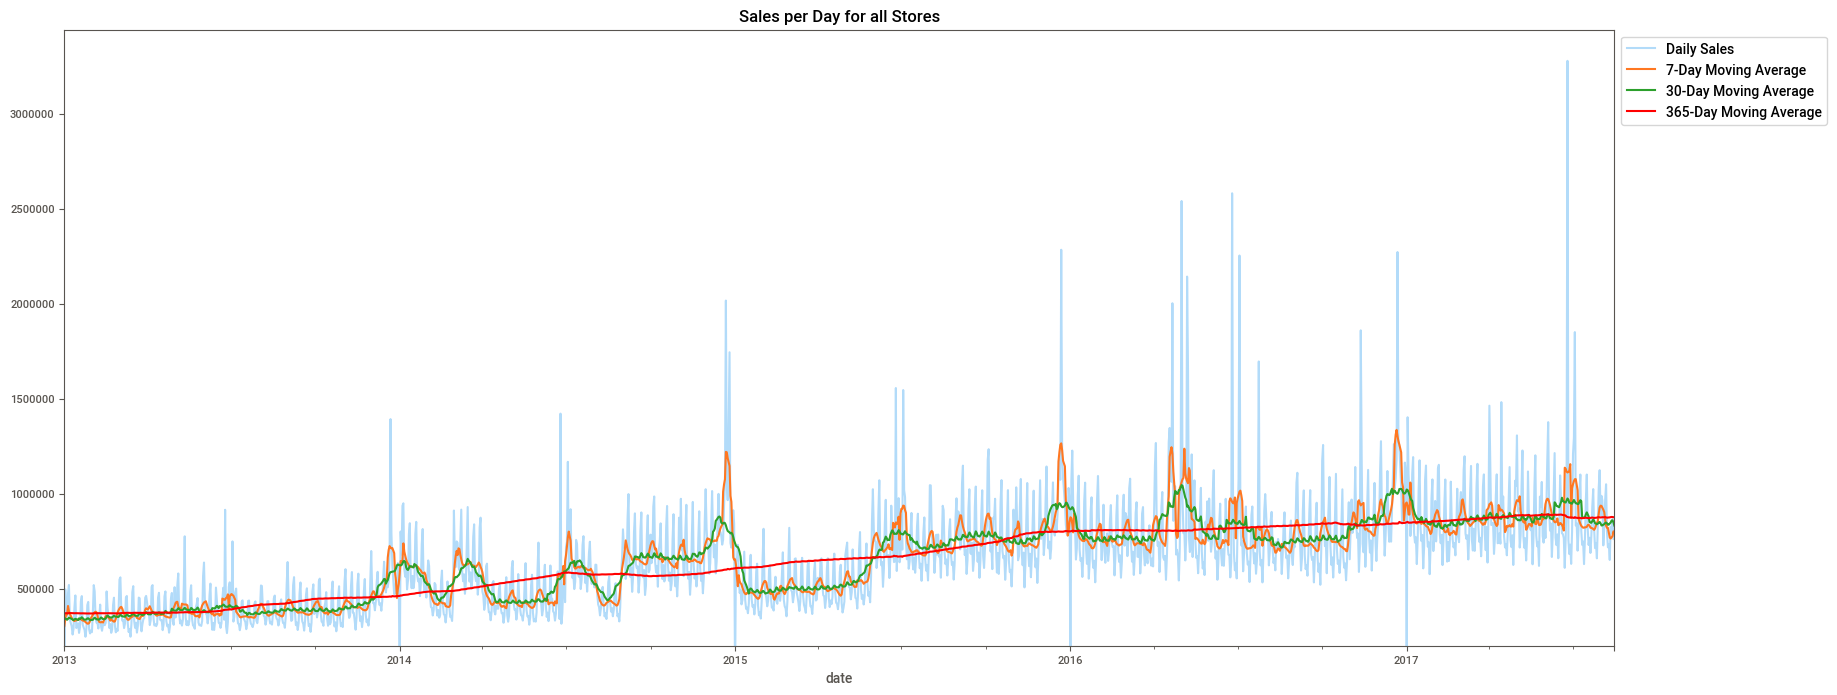

In [470]:
# Group the sales data by date and calculate the sum of sales per day
Daily_sales= merged_df.groupby('date').agg({'sales':'sum'}).to_period("D")

# Copy the daily sales data into three different variables to apply different smoothing windows on them
Daily_sales_smooth7 = Daily_sales.copy()
Daily_sales_smooth30 = Daily_sales.copy()
Daily_sales_smooth365 = Daily_sales.copy()

# Apply 7-day moving average smoothing on daily sales data
Daily_sales_smooth7["sales"] = Daily_sales_smooth7.sales.rolling(window=7, center=True, min_periods=1).mean()

# Apply 30-day moving average smoothing on daily sales data
Daily_sales_smooth30["sales"] = Daily_sales_smooth30.sales.rolling(window=30, center=True, min_periods=3).mean()

# Apply 365-day moving average smoothing on daily sales data
Daily_sales_smooth365["sales"] = Daily_sales_smooth365.sales.rolling(window=365, center=True, min_periods=6).mean()

# Create a figure with specified size and axis
figsize = (20,8)
fig, ax = plt.subplots(figsize=figsize)

# Plot the daily sales, 7-day moving average, 30-day moving average, and 365-day moving average
Daily_sales.plot(ax=ax, alpha=0.3)
Daily_sales_smooth7.plot(ax=ax)
Daily_sales_smooth30.plot(ax=ax)
Daily_sales_smooth365.plot(ax=ax, color="r")

# Add a legend to the plot
ax.legend(["Daily Sales","7-Day Moving Average","30-Day Moving Average","365-Day Moving Average"],bbox_to_anchor=(1.0, 1.0))

# Add the title and y-axis limit to the plot
ax.set(ylim=2e5, title="Sales per Day for all Stores")

# Show the plot
plt.show()


#### QUESTION 6.2: Transaction Analysis with Time

In [475]:
store_sales= Train_df.groupby(["date", "store_nbr"]).agg({'sales':'sum'}).reset_index()
#store_sales = Train_df.groupby(["date", "store_nbr"]).sales.sum().reset_index()

trans_df = pd.merge(store_sales,Transaction_df,how = "left",on=["date","store_nbr"])

In [476]:
trans_df.sample(5)

date  store_nbr         sales  transactions
33614 2014-09-16         27  10466.427000        1263.0
1716  2013-02-01         43   5645.272000        1499.0
30206 2014-07-15         21      0.000000           NaN
61117 2016-02-09         44  48778.313000        4311.0
62094 2016-02-27         49  37488.661996        3215.0

In [477]:
trans_df.isnull().sum()

date               0
store_nbr          0
sales              0
transactions    7448
dtype: int64

In [478]:
trans_df["transactions"].bfill(inplace=True)

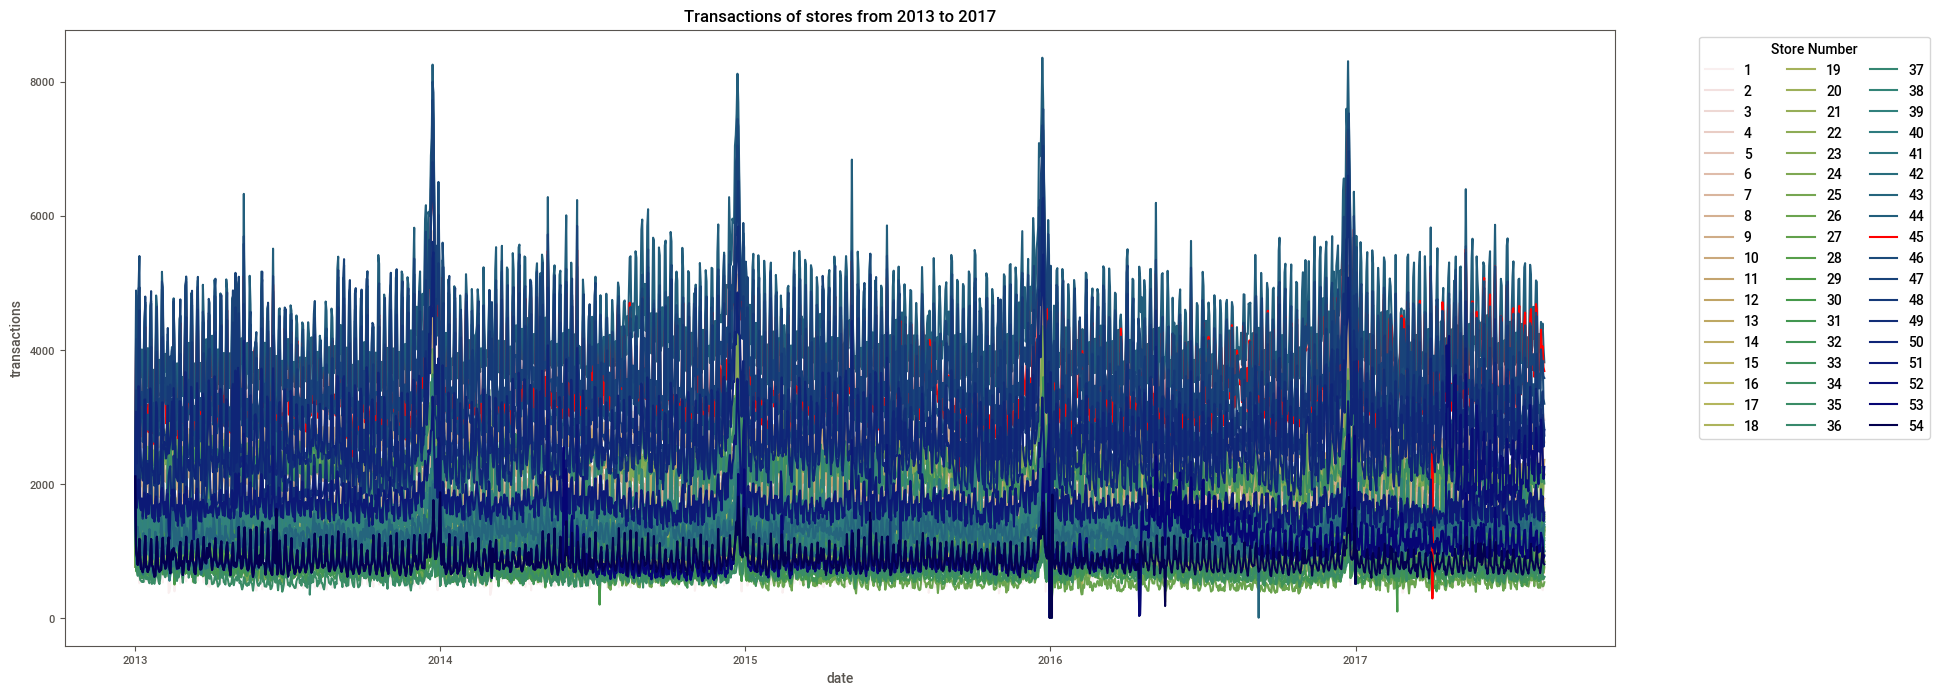

In [481]:
# Find the store with the highest total transactions
highest_trans_store = trans_df.groupby(by='store_nbr').agg({'transactions':'sum'}).sort_values(by='transactions',ascending=False).index[0]

figsize = (20,8)
fig, ax = plt.subplots(figsize=figsize)

# Create a custom color palette
custom_palette = sns.color_palette("gist_earth_r", n_colors=trans_df.store_nbr.nunique())

custom_palette[highest_trans_store] = 'r' # change the color of the highest transaction store to red

# Use the custom palette in the lineplot
sns.lineplot(data=trans_df, x='date', y='transactions', hue='store_nbr', ax=ax, palette=custom_palette)
ax.set(title="Transactions of stores from 2013 to 2017")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',ncol=3,title="Store Number")
plt.show();


- There is a stable pattern in transactions over the years. They are peaking at december similar to sales 

In [482]:
trans_df["year"] = trans_df.date.dt.year
trans_df["month"] = trans_df.date.dt.month

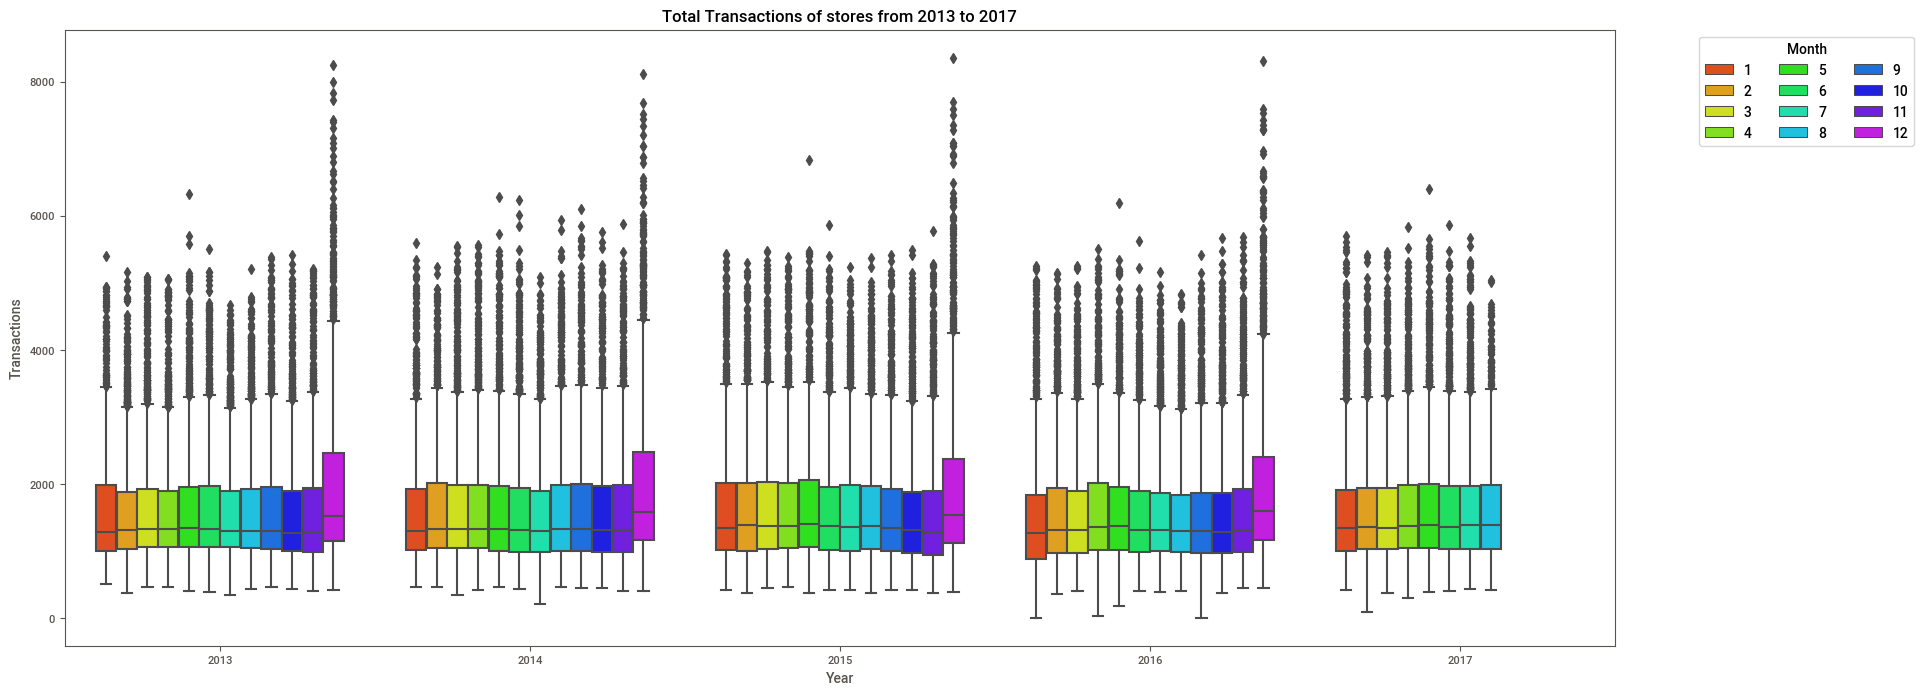

In [483]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=trans_df, x='year', y='transactions', hue='month', ax=ax, palette=sns.color_palette("gist_rainbow", n_colors=trans_df.month.nunique()))
ax.set(title="Total Transactions of stores from 2013 to 2017")
ax.set_xlabel("Year")
ax.set_ylabel("Transactions")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',ncol=3,title="Month")
plt.show()


- The transactions are indeed very high during December. 
- we could also observe that the transactions increased during summer.

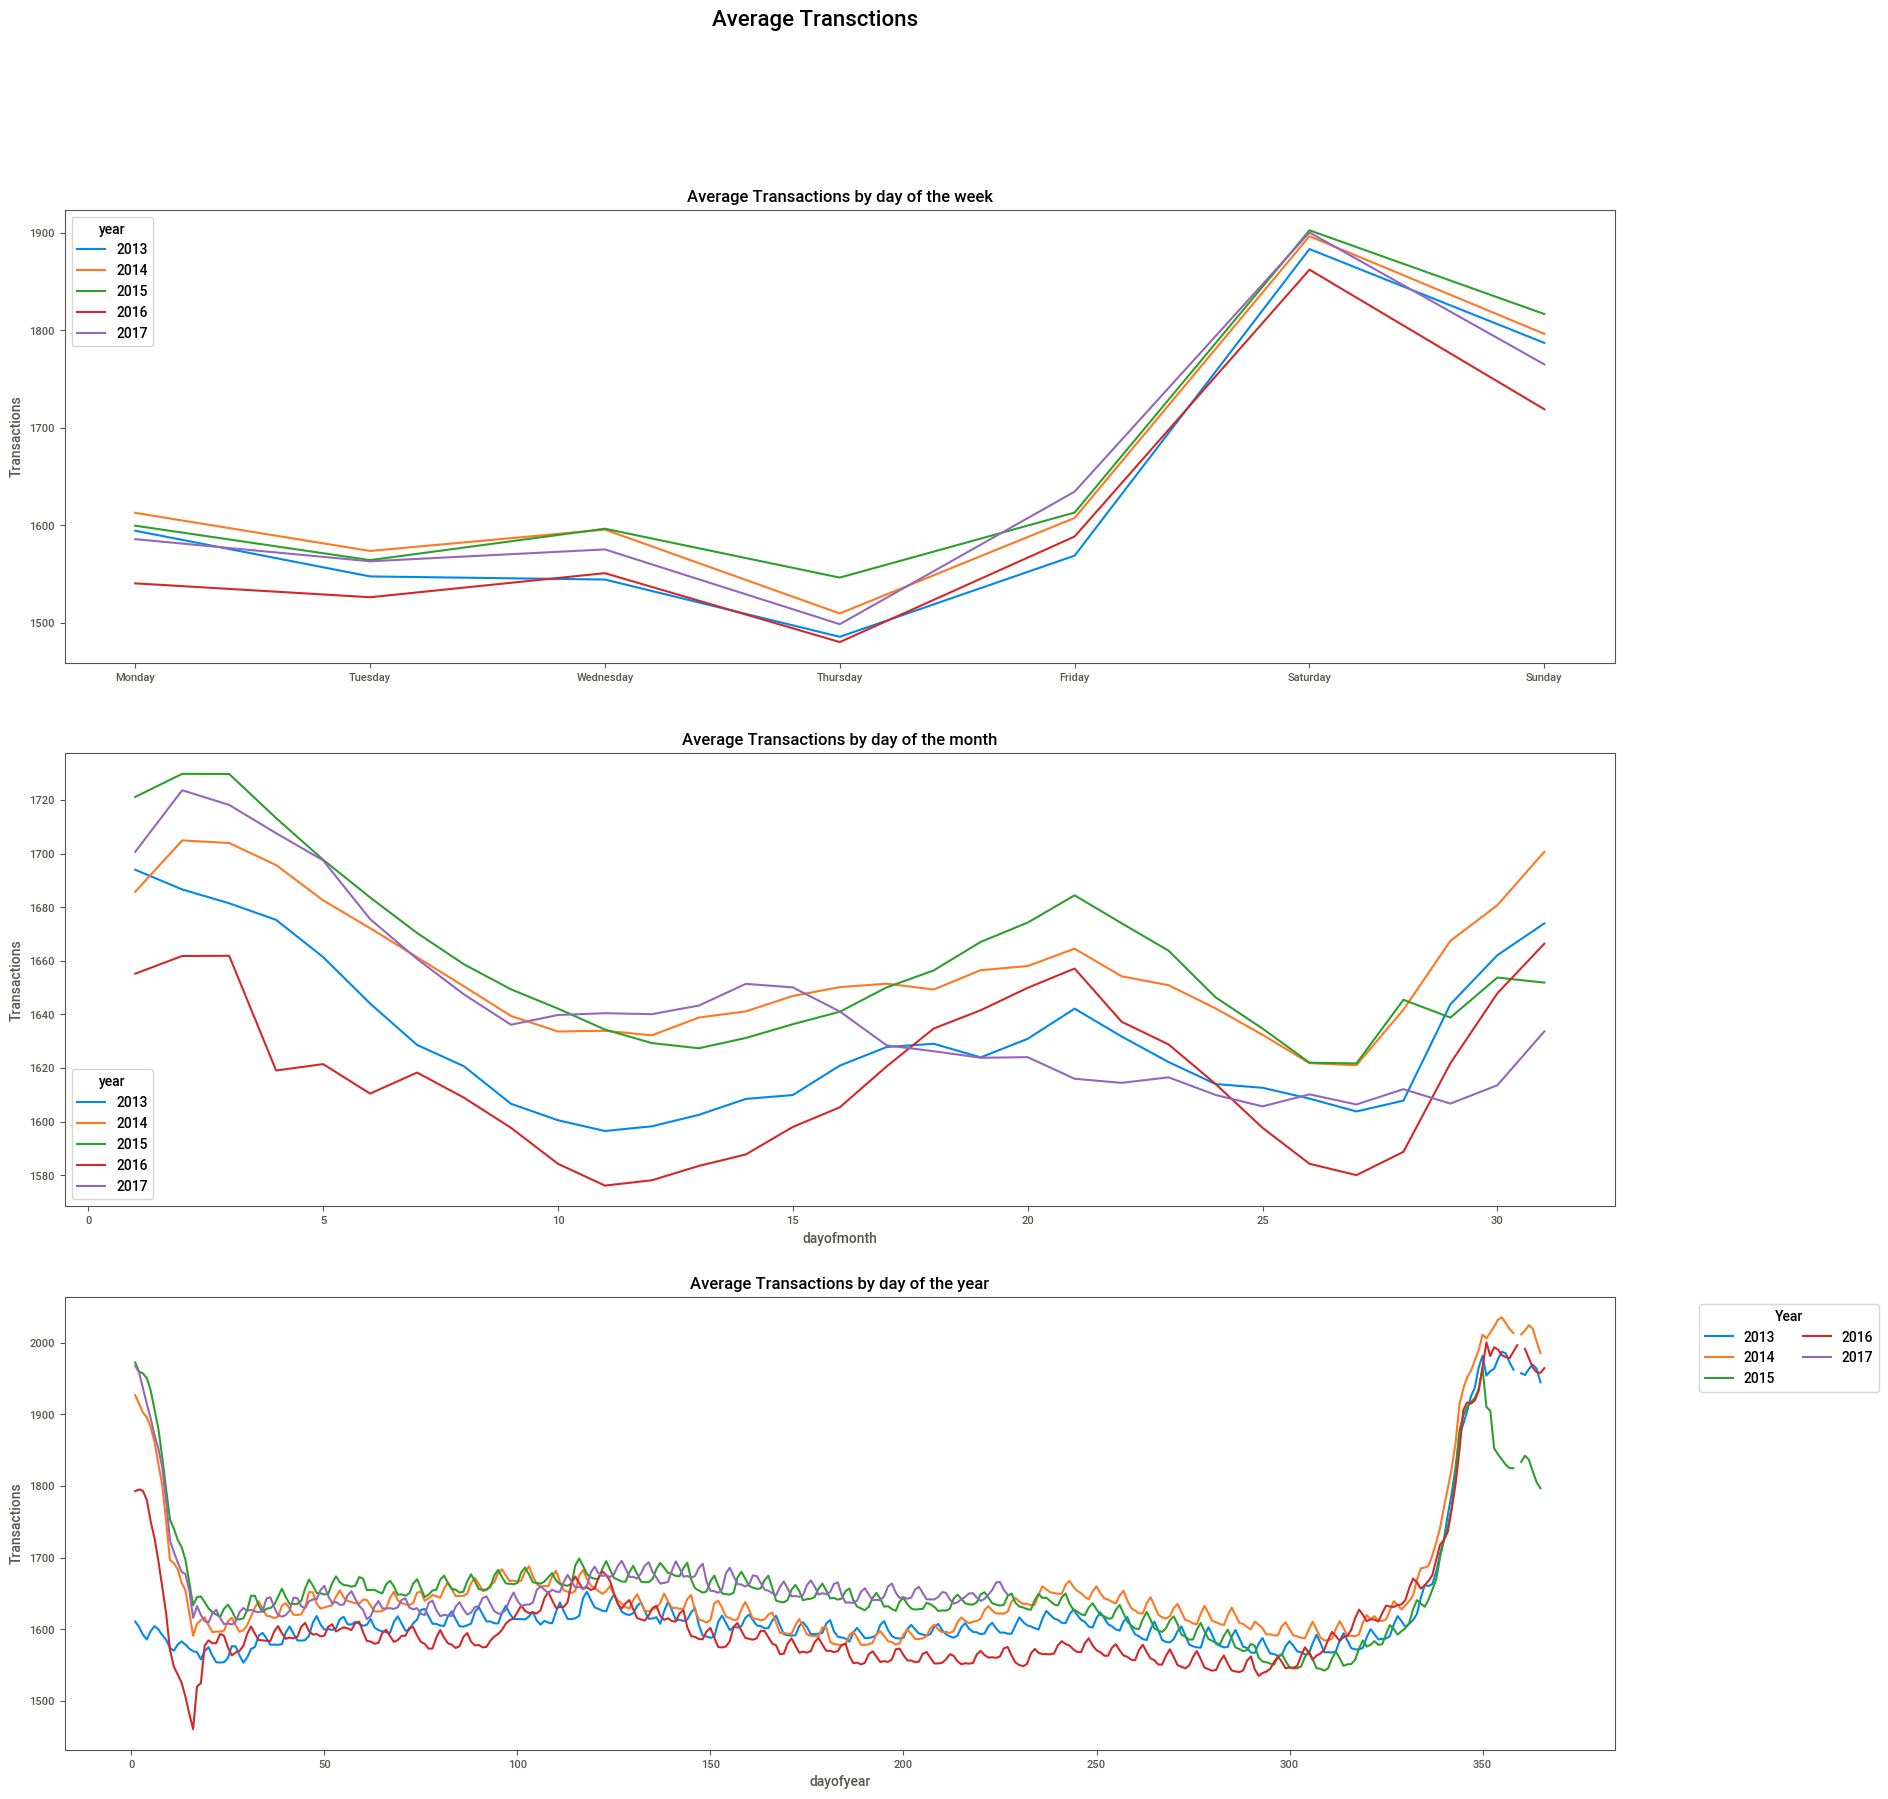

In [484]:
trans_df["dayofweek"] = trans_df.date.dt.dayofweek
trans_df["dayofmonth"] = trans_df.date.dt.day
trans_df["dayofyear"] = trans_df.date.dt.dayofyear
week_list = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
month_list = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# Set figure size
figsize = (20,20)

# Create 3 subplots with 1 column and 3 rows
fig, (ax1,ax2,ax3) = plt.subplots(ncols=1,nrows=3,figsize=figsize)

# Create new columns for day of week, day of month and day of year
trans_df["dayofweek"] = trans_df.date.dt.dayofweek
trans_df["dayofmonth"] = trans_df.date.dt.day
trans_df["dayofyear"] = trans_df.date.dt.dayofyear

# Calculate mean transactions by day of week, year
week_data = trans_df.groupby(by=["year","dayofweek"]).agg({"transactions":"mean"}).reset_index()
week_data = pd.pivot(data=week_data,index="dayofweek",values="transactions",columns="year")
week_data.index = week_list
week_data.plot(ax=ax1)

# Set y-axis label and title for first subplot
ax1.set_ylabel("Transactions")
ax1.set(title="Average Transactions by day of the week")

# Calculate mean transactions by day of month, year and apply 7-day rolling mean
month_data = trans_df.groupby(by=["year","dayofmonth"]).agg({"transactions":"mean"}).reset_index()
month_data["transactions"] = month_data["transactions"].rolling(window=7,center=True,min_periods=3).mean()
month_data = pd.pivot(data=month_data,index="dayofmonth",values="transactions",columns="year")
month_data.plot(ax=ax2)

# Set y-axis label and title for second subplot
ax2.set_ylabel("Transactions")
ax2.set(title="Average Transactions by day of the month")

# Calculate mean transactions by day of year, year and apply 30-day rolling mean
year_data = trans_df.groupby(by=["year","dayofyear"]).agg({"transactions":"mean"}).reset_index().sort_values(by=["year","dayofyear"])
year_data["transactions"] = year_data["transactions"].rolling(window=30,center=True,min_periods=15).mean()
year_data = pd.pivot(data=year_data,index="dayofyear",values="transactions",columns="year")
year_data.plot(ax=ax3)

# Set y-axis label and title for third subplot
ax3.set_ylabel("Transactions")
ax3.set(title="Average Transactions by day of the year")

# Set overall title for the figure
fig.suptitle("Average Transctions",fontsize=16,fontweight="bold")

# Add legend with 2 columns and located at upper left corner
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',ncol=2,title="Year")

# Display the figure
plt.show();


#### QUESTION 6.3: Oil Price Analysis with Time

In [85]:
# Merge the sum of sales from Train_df with oil price data from oil_df
sales_data = pd.merge(Train_df.groupby("date").agg({"sales":"sum"}),oil_df,on="date",how="left")

# Merge the sum of transactions from Transaction_df with the previously merged data
sales_data = pd.merge(sales_data,Transaction_df.groupby(by="date").agg({"transactions":"sum"}),
                      on="date",how="left").set_index("date")

In [86]:
sales_data.head()

sales  dcoilwtico  transactions
date                                               
2013-01-01    2511.618999       93.14         770.0
2013-01-02  496092.417944       93.14       93215.0
2013-01-03  361461.231124       92.97       78504.0
2013-01-04  354459.677093       93.12       78494.0
2013-01-05  477350.121229         NaN       93573.0

In [87]:
sales_data.isnull().sum()

sales             0
dcoilwtico      481
transactions      2
dtype: int64

In [90]:
# Fill missing oil price data with the last known value
sales_data["dcoilwtico"].bfill(inplace=True)
sales_data["transactions"].bfill(inplace=True)


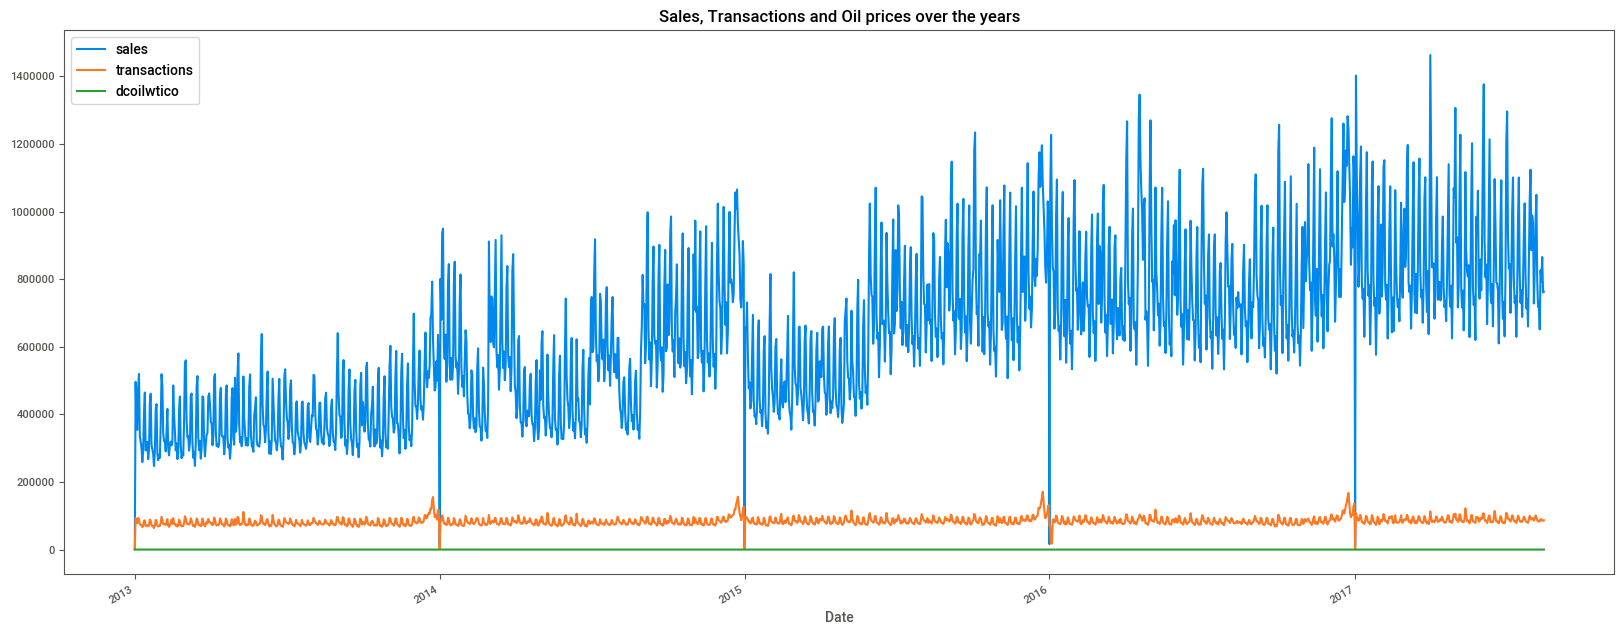

In [91]:
# Create a figure and axis object
figsize=(20,8)
fig,ax = plt.subplots(figsize=figsize)

# Plot the sales, transactions and oil prices on the same axis
sales_data["sales"].plot(ax=ax)
sales_data["transactions"].plot(ax=ax)
sales_data["dcoilwtico"].plot(ax=ax)

# Add a title and x-axis label
ax.set_title("Sales, Transactions and Oil prices over the years")
ax.set_xlabel("Date")

# Add a legend
ax.legend(["sales","transactions","dcoilwtico"])

# Display the plot
fig.show()


In [92]:

#Create new column for log of sales
sales_data["log_sales"] = sales_data["sales"].apply(np.log)

# Create new column for log of transactions
sales_data["log_transactions"] = sales_data["transactions"].apply(np.log)

# Create new column for log of dcoilwtico
sales_data["log_dcoilwtico"] = sales_data["dcoilwtico"].apply(np.log)

# Display a sample of the data
sales_data.sample(5) 

sales  dcoilwtico  transactions  log_sales  \
date                                                             
2015-12-12  915667.884291       36.31      103409.0  13.727409   
2016-06-09  547139.612941       50.52       73785.0  13.212459   
2013-02-23  412897.349113       92.74       88390.0  12.930954   
2014-09-01  812526.219024       92.92       87941.0  13.607903   
2017-02-22  739388.034403       53.61       79788.0  13.513578   

            log_transactions  log_dcoilwtico  
date                                          
2015-12-12         11.546447        3.592093  
2016-06-09         11.208911        3.922369  
2013-02-23         11.389514        4.529800  
2014-09-01         11.384421        4.531739  
2017-02-22         11.287128        3.981736

By transforming these columns into logarithms, the distributions of these variables become more well-behaved, making it easier to identify trends and patterns in the data. 

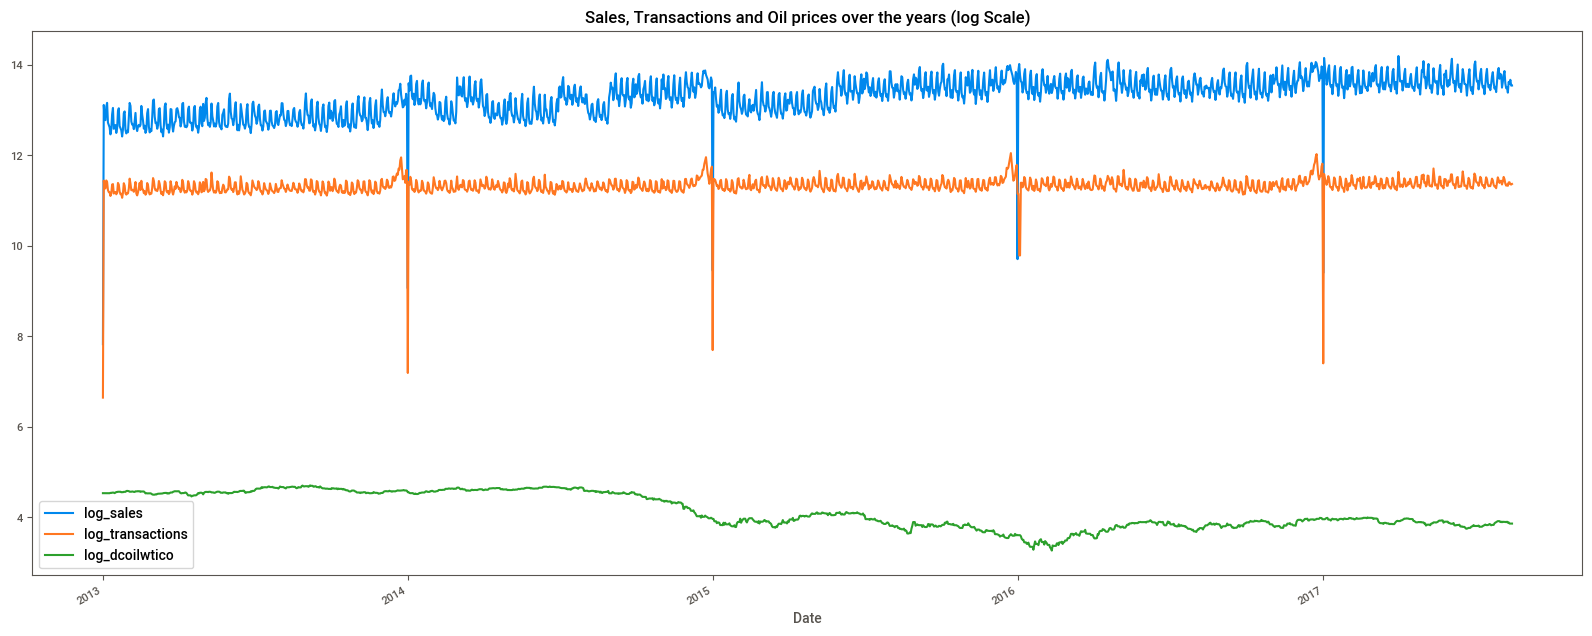

In [93]:
# Create a figure and set its size
figsize=(20,8)
fig,ax = plt.subplots(figsize=figsize)

# Plot the log of sales, transactions, and oil prices on the same plot
sales_data["log_sales"].plot(ax=ax)
sales_data["log_transactions"].plot(ax=ax)
sales_data["log_dcoilwtico"].plot(ax=ax)

# Set the title of the plot
ax.set_title("Sales, Transactions and Oil prices over the years (log Scale)")

# Set the x-axis label
ax.set_xlabel("Date")

# Add legend to the plot
ax.legend(["log_sales","log_transactions","log_dcoilwtico"])

# Display the plot
fig.show();


- We could observe that even though there is a decrease in oil price the sales and Transactions are in increasing Trend. 

## HYPOTHESIS TESTING 

In [94]:
from scipy.stats import ttest_ind

# Extract the sales of products when they are on promotion and when they are not
sales_on_promotion = merged_df[merged_df['onpromotion_encoded'] == 1]['sales']
sales_not_on_promotion = merged_df[merged_df['onpromotion_encoded'] == 0]['sales']

# Perform t-test
t_stat, p_value = ttest_ind(sales_on_promotion, sales_not_on_promotion)

# Print the t-statistic and p-value
print("t-statistic: ", t_stat)
print("p-value: ", p_value)


t-statistic:  745.1036104435243
p-value:  0.0


In [95]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(merged_df['onpromotion_encoded'], merged_df['sales'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-squared statistic: ", chi2)
print("p-value: ", p)


Chi-squared statistic:  1478150.148349317
p-value:  0.0


A p-value of 0 suggests that the null hypothesis can be rejected and that there is strong evidence of a significant difference between the groups.